# Tensorflow

In [46]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
# from cnn_utils import *
# from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

## 显示图像

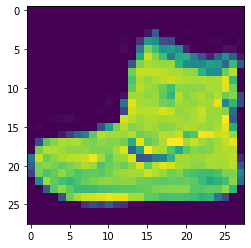

In [47]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
plt.imshow(training_images[0])

## 范数

np.linalg.norm(x, ord=None, axis=None, keepdims=False)

In [20]:
dist = np.linalg.norm(encoding - database[identity])

NameError: name 'encoding' is not defined

## zeropadding

tfl.ZeroPadding2D(padding=3,input_shape=(64,64,3))

这一步是包括input_shape的，写在函数内

零填充层

## 输入

In [5]:
tf.keras.Input(
    shape=None, batch_size=None, name=None, dtype=None, sparse=None, tensor=None,
    ragged=None, type_spec=None, **kwargs
)

NameError: name 'tf' is not defined

## Conv1D

In [ ]:
tf.keras.layers.Conv1D(
    filters,
    kernel_size,
    strides=1,
    padding="valid",
    data_format="channels_last",
    dilation_rate=1,
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

## Conv2D

见文章 https://www.pythonheidong.com/blog/article/463777/80a8ff950bd528382646/

tfl.Conv2D(32, (7,7), strides=(1, 1), padding='valid')

In [4]:
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)

NameError: name 'filters' is not defined

filter 过滤器的数量  
kernel_size 卷积核的大小(h,w)，长宽一样可以用一个数来表示  
stride 步长  
padding是填充方式，如果padding = valid(默认)不填充，padding = same，用0填充  
data_format是数据结果的格式

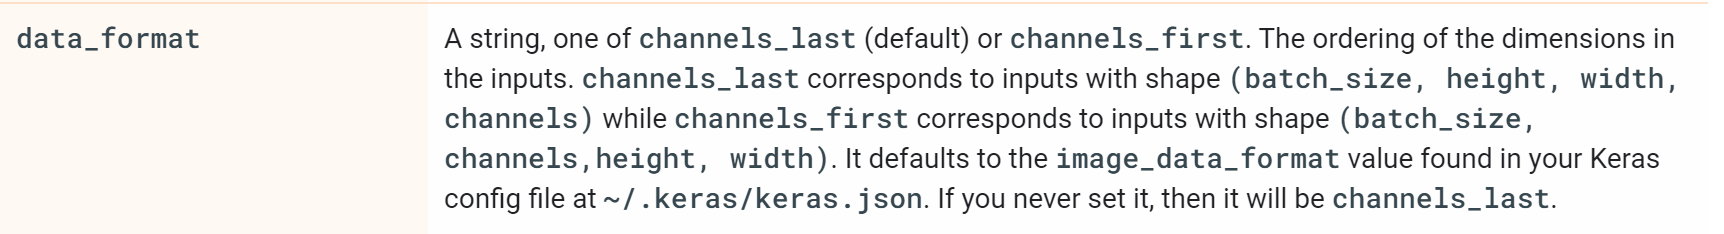

输出格式和输入格式是一样的，channel_first/channel_last

### 输入

In [8]:
input_img = tf.keras.Input(shape=input_shape)
Z1 = tfl.Conv2D(8, (4,4), strides=(1, 1), padding='SAME')(input_image)

NameError: name 'input_shape' is not defined

## BatchNormalization

tfl.BatchNormalization(axis=3, momentum=0.99, epsilon=0.001)  
这里的axis是指向channel的维度

批量归一化

## convert_to_tensor

将数据转换为张量

In [48]:
tf.convert_to_tensor

<function tensorflow.python.framework.ops.convert_to_tensor_v2_with_dispatch(value, dtype=None, dtype_hint=None, name=None)>

## ReLU

tf.keras.layers.ReLU(
    max_value=None, negative_slope=0, threshold=0, **kwargs
)

In [9]:
layer = tf.keras.layers.ReLU()
output = layer([-3.0, -1.0, 0.0, 2.0])
list(output.numpy())

[0.0, 0.0, 0.0, 2.0]

函数调用的时候是ReLU()(x)

## Sequentia

In [6]:
tf.keras.Sequential(
    layers=None, name=None
)

NameError: name 'tf' is not defined

## MaxPooling2D

In [2]:
tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), strides=None, padding='valid', data_format=None,
    **kwargs
)

NameError: name 'tf' is not defined

tfl.MaxPool2D()

最大池化

## AveragePooling2D

In [3]:
tf.keras.layers.AveragePooling2D(
    pool_size=(2, 2), strides=None, padding='valid', data_format=None,
    **kwargs
)

NameError: name 'tf' is not defined

## GlobalAveragePooling2D

In [13]:
tf.keras.layers.GlobalAveragePooling2D(
    data_format=None, keepdims=False, **kwargs
)

NameError: name 'tf' is not defined

与AveragePooling2D的区别是这个会将每个通道全部数求平均得到一个平均值

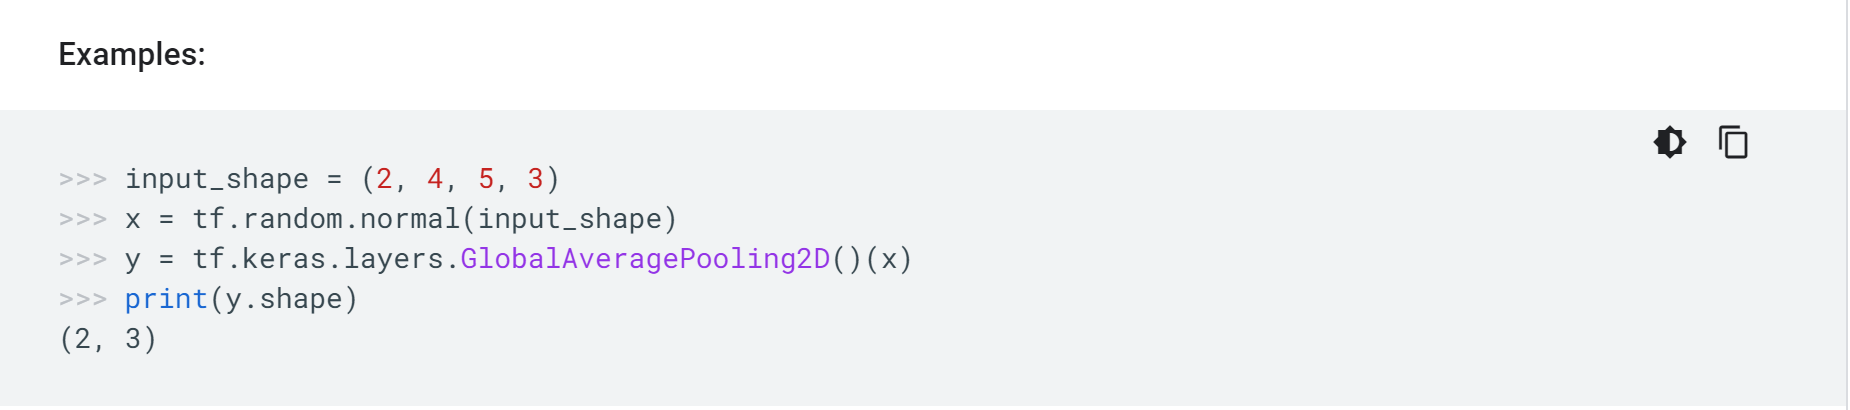

## Conv2DTranspose

In [13]:
tf.keras.layers.Conv2DTranspose(
    filters, kernel_size, strides=(1, 1), padding='valid',
    output_padding=None, data_format=None, dilation_rate=(1, 1), activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)

NameError: name 'filters' is not defined

## dropout

In [12]:
tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)

NameError: name 'tf' is not defined

## Flatten

Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。Flatten不影响batch的大小

tfl.Flatten()

## GradientTape

In [26]:
tf.GradientTape(
    persistent=False, watch_accessed_variables=True
)

## Add

In [4]:
tf.keras.layers.Add(
    **kwargs
)

NameError: name 'tf' is not defined

In [5]:
input1 = tf.keras.layers.Input(shape=(16,))
x1 = tf.keras.layers.Dense(8, activation='relu')(input1)
input2 = tf.keras.layers.Input(shape=(32,))
x2 = tf.keras.layers.Dense(8, activation='relu')(input2)
# equivalent to `added = tf.keras.layers.add([x1, x2])`
added = tf.keras.layers.Add()([x1, x2])
out = tf.keras.layers.Dense(4)(added)
model = tf.keras.models.Model(inputs=[input1, input2], outputs=out)

NameError: name 'tf' is not defined

## matmul

In [22]:
tf.linalg.matmul(
    a, b, transpose_a=False, transpose_b=False, adjoint_a=False, adjoint_b=False,
    a_is_sparse=False, b_is_sparse=False, output_type=None, name=None
)

InvalidArgumentError: Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul]

乘法

## Dense

全连接层，可以用来放在最后一层做预测结果用

tfl.Dense(1, activation='sigmoid')

In [5]:
tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)

NameError: name 'units' is not defined

全连接层

## activation

In [7]:
tf.keras.layers.Activation(
    activation, **kwargs
)

NameError: name 'tf' is not defined

In [ ]:
layer = tf.keras.layers.Activation('relu')
layer = tf.keras.layers.Activation('softmax')

## softmax

In [ ]:
tf.nn.softmax(
    logits, axis=None, name=None
)

## Model

In [8]:
tf.keras.Model(
    *args, **kwargs
)

NameError: name 'tf' is not defined

这里的args包括inputs,outputs

## compile

model.compile(optimizer = 优化器，

                        loss = 损失函数，

                        metrics = ["准确率”])

In [6]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

NameError: name 'happy_model' is not defined

## loss

In [15]:
tf.keras.losses.BinaryCrossentropy(
    from_logits=False, label_smoothing=0.0, axis=-1,
    reduction=losses_utils.ReductionV2.AUTO, name='binary_crossentropy'
)

NameError: name 'tf' is not defined

计算真实标签和预测标签之间的交叉熵损失

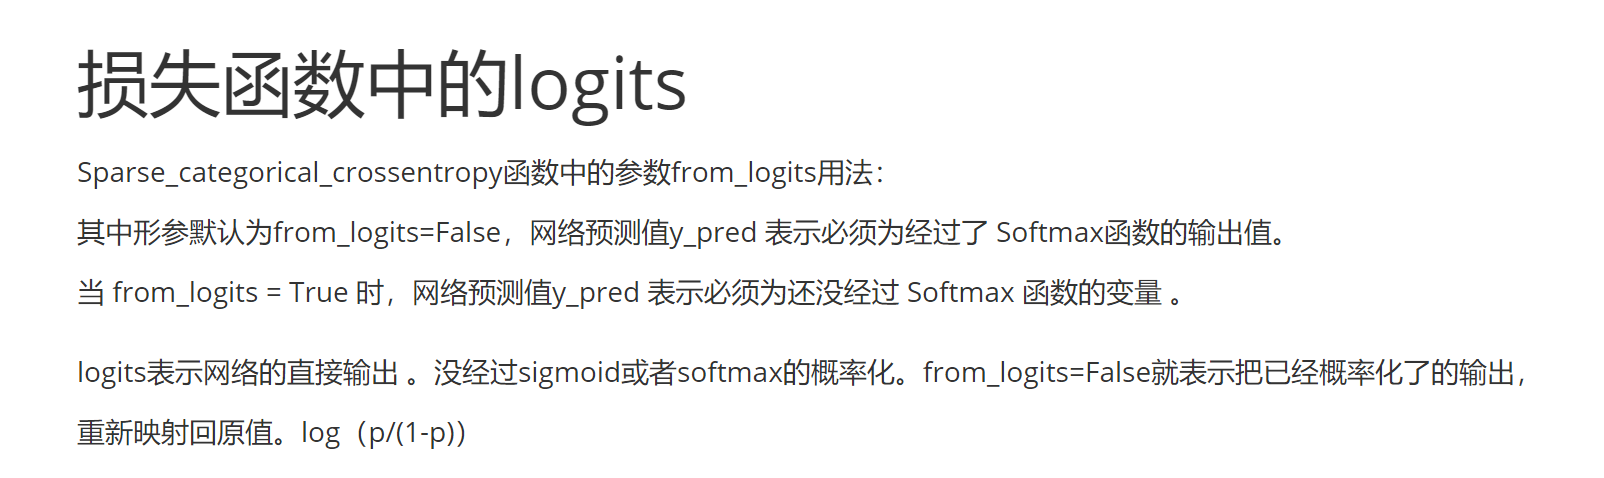

from_logits = True: 原输出值，没有经过转换为概率  
from_logits = False: 不是原输出值，也就是经过了转换的值

## tf.reshape

In [21]:
tf.reshape(
    tensor, shape, name=None
)

NameError: name 'tensor' is not defined

reshape中值为-1表示通过计算自动计算剩下来的维度的值

tf.reshape(a_C, shape=[m, n_H * n_W, n_C]) gives the same result as tf.reshape(a_C, shape=[m, -1, n_C])

## Layers.Reshape

In [3]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((3, 4), input_shape=(12,)))

In [5]:
model.output_shape

(None, 3, 4)

## transpose

In [23]:
tf.transpose(
    a, perm=None, conjugate=False, name='transpose'
)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 5, 2],
       [2, 3, 6]])>

In [25]:
# Reshape the images from (n_H * n_W, n_C) to have them of shape (n_C, n_H * n_W) (≈2 lines)
a_S = tf.transpose(tf.reshape(a_S,shape = [-1,n_C]),perm = [1,0])
a_G = tf.transpose(tf.reshape(a_G,shape = [-1,n_C]),perm = [1,0])

NameError: name 'a_S' is not defined

这里的-1是自动补全，perm是颠倒顺序

tf.transpose(a_C, perm=[0,3,1,2]) changes the dimensions from  (𝑚,𝑛𝐻,𝑛𝑊,𝑛𝐶)  to  (𝑚,𝑛𝐶,𝑛𝐻,𝑛𝑊)

## optimizers

In [16]:
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', **kwargs
)

NameError: name 'tf' is not defined

## compile

优化训练效果

In [18]:
base_learning_rate = 0.001
model2.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

NameError: name 'model2' is not defined

In [ ]:
### START CODE HERE ### (≈2 lines)
opt = Adam(lr = 0.005, beta_1= 0.9, beta_2= 0.999, decay=0.01) # Adam(...) 
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
### END CODE HERE ###

## fit

happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

In [60]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 95ms/step - loss: 0.5657 - accuracy: 0.7850
Epoch 2/10
38/38 [==============================] - 4s 92ms/step - loss: 0.2070 - accuracy: 0.9083
Epoch 3/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1265 - accuracy: 0.9483
Epoch 4/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1469 - accuracy: 0.9333
Epoch 5/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1154 - accuracy: 0.9567
Epoch 6/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1496 - accuracy: 0.9500
Epoch 7/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0849 - accuracy: 0.9717
Epoch 8/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1620 - accuracy: 0.9450
Epoch 9/10
38/38 [==============================] - 4s 97ms/step - loss: 0.1727 - accuracy: 0.9383
Epoch 10/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1422 - accuracy: 0.9517


## argmax

返回最大的索引值

In [1]:
tf.math.argmax(
    input, axis=None, output_type=tf.dtypes.int64, name=None
)

NameError: name 'tf' is not defined

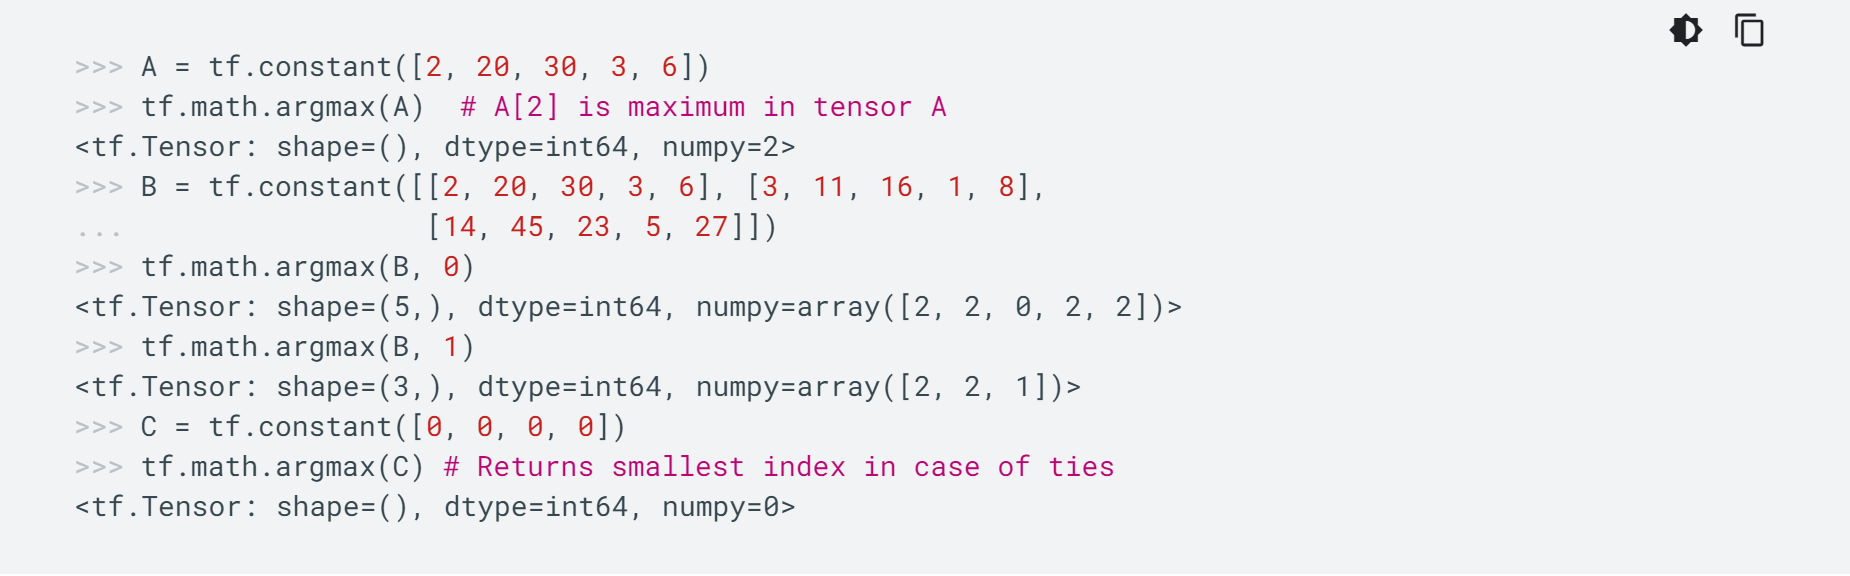

## reduce_max

In [3]:
tf.math.reduce_max(
    input_tensor, axis=None, keepdims=False, name=None
)

NameError: name 'tf' is not defined

保留对应维度的最大值

In [7]:
import tensorflow as tf
import numpy as np
 
a=np.array([[1, 2],
            [5, 3],
            [2, 6]])
 
b = tf.Variable(a)

print('************')
# 对于二维矩阵，axis=0轴可以理解为行增长方向（向下）即按列求最值,axis=1轴可以理解为列增长方向(向右）按列行求最值
print(tf.reduce_max(b, axis=1, keepdims=False))  # keepdims=False,axis=1被消减，不保持原状，本来shape为（3,1），后来变成（1,3）了
print('************')
print(tf.reduce_max(b, axis=1, keepdims=True))
print('************')
print(tf.reduce_max(b, axis=0, keepdims=True))
print('************')
print(tf.reduce_max(b, axis=-1, keepdims=True))

************
tf.Tensor([2 5 6], shape=(3,), dtype=int32)
************
tf.Tensor(
[[2]
 [5]
 [6]], shape=(3, 1), dtype=int32)
************
tf.Tensor([[5 6]], shape=(1, 2), dtype=int32)
************
tf.Tensor(
[[2]
 [5]
 [6]], shape=(3, 1), dtype=int32)


keepdims = False是不保留维度  
keepdims = True 是保留维度  
axis = 1 是竖直向下的方向  
axis = 0 是水平方向

## non_max_suppression

In [8]:
tf.image.non_max_suppression(
    boxes, scores, max_output_size, iou_threshold=0.5,
    score_threshold=float('-inf'), name=None
)

NameError: name 'boxes' is not defined

A 1-D integer Tensor of shape [M] representing the selected indices from the boxes tensor, where M <= max_output_size.

返回的是选中的边框的下标

## gather

In [9]:
tf.gather(
    params, indices, validate_indices=None, axis=None, batch_dims=0, name=None
)

NameError: name 'params' is not defined

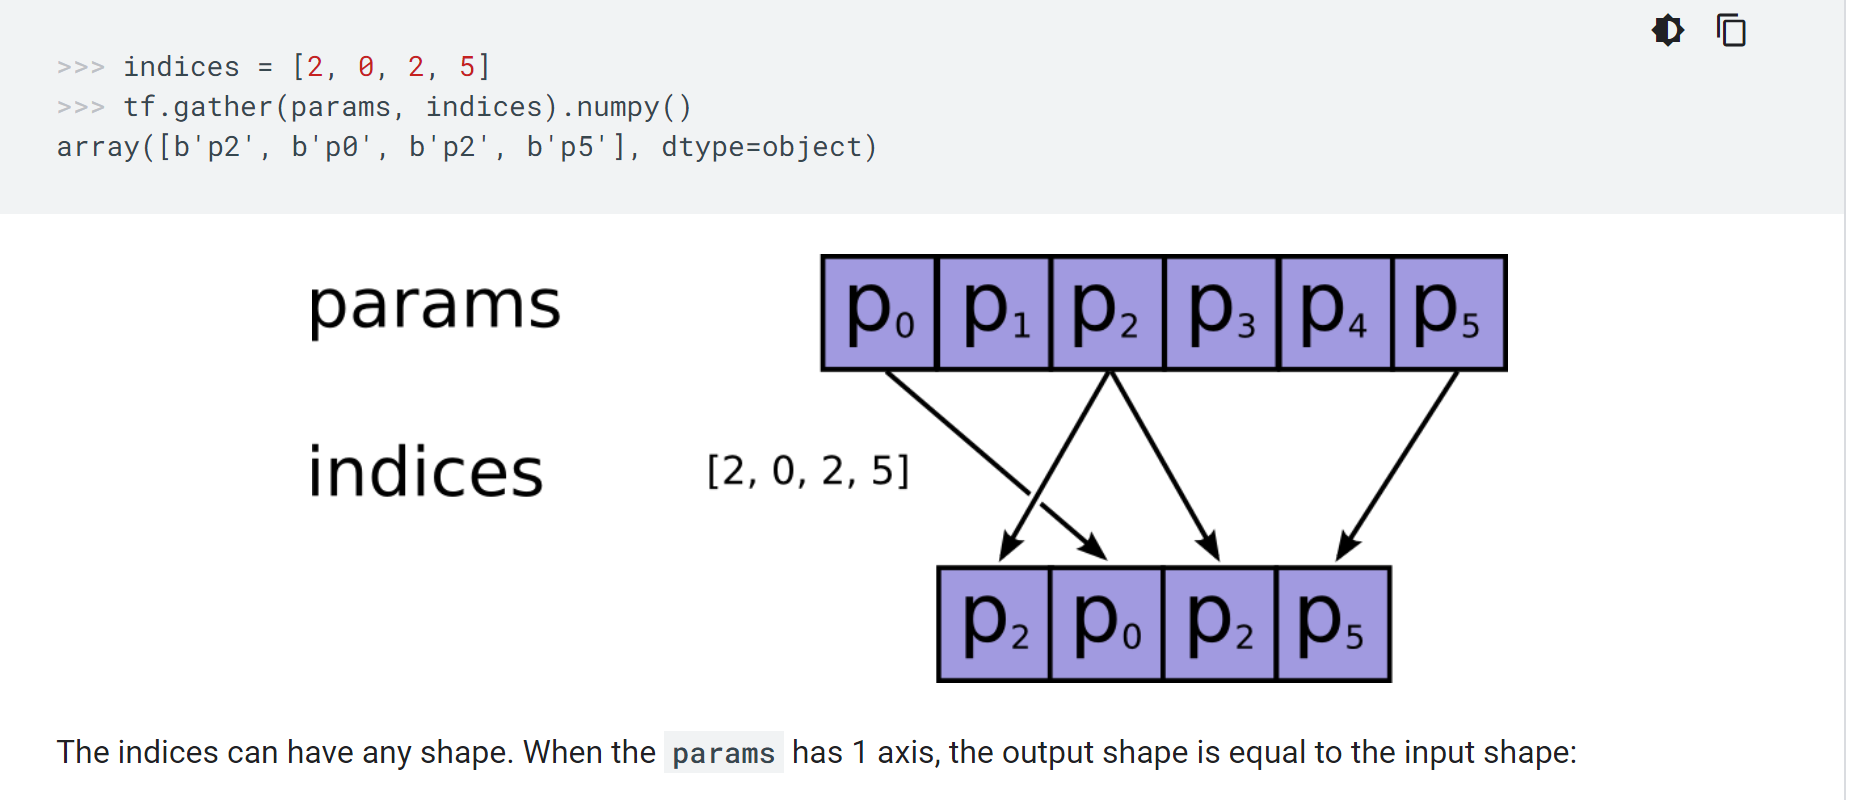

In [10]:
params = tf.constant(['p0', 'p1', 'p2', 'p3', 'p4', 'p5'])

In [11]:
params[3].numpy()

b'p3'

In [12]:
tf.gather(params, 3).numpy()

b'p3'

本质上就是切片

## 图片增强

In [9]:
tf.keras.layers.RandomFlip(
    mode=HORIZONTAL_AND_VERTICAL, seed=None, **kwargs
)

NameError: name 'tf' is not defined

In [10]:
tf.keras.layers.RandomRotation(
    factor, fill_mode='reflect', interpolation='bilinear',
    seed=None, fill_value=0.0, **kwargs
)

NameError: name 'tf' is not defined

## one_hot

In [2]:
indices = [0, 1, 2]
depth = 3
tf.one_hot(indices, depth) 

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

## embedding 词嵌入

In [ ]:
tf.keras.layers.Embedding(vocab_size,emb_dim)

embedding_layer = tf.keras.layers.Embedding(vocab_size,emb_dim)

# Step 4 (already done for you; please do not modify)
# Build the embedding layer, it is required before setting the weights of the embedding layer. 
embedding_layer.build((None,)) # Do not modify the "None".  This line of code is complete as-is.

# Set the weights of the embedding layer to the embedding matrix. Your layer is now pretrained.
embedding_layer.set_weights([emb_matrix])

输入数/第一个值 是矩阵E的行数，也就是所有不同单词的数量  
输出数/第二个值 是矩阵E的列数，也就是每个单词的特征值的数量

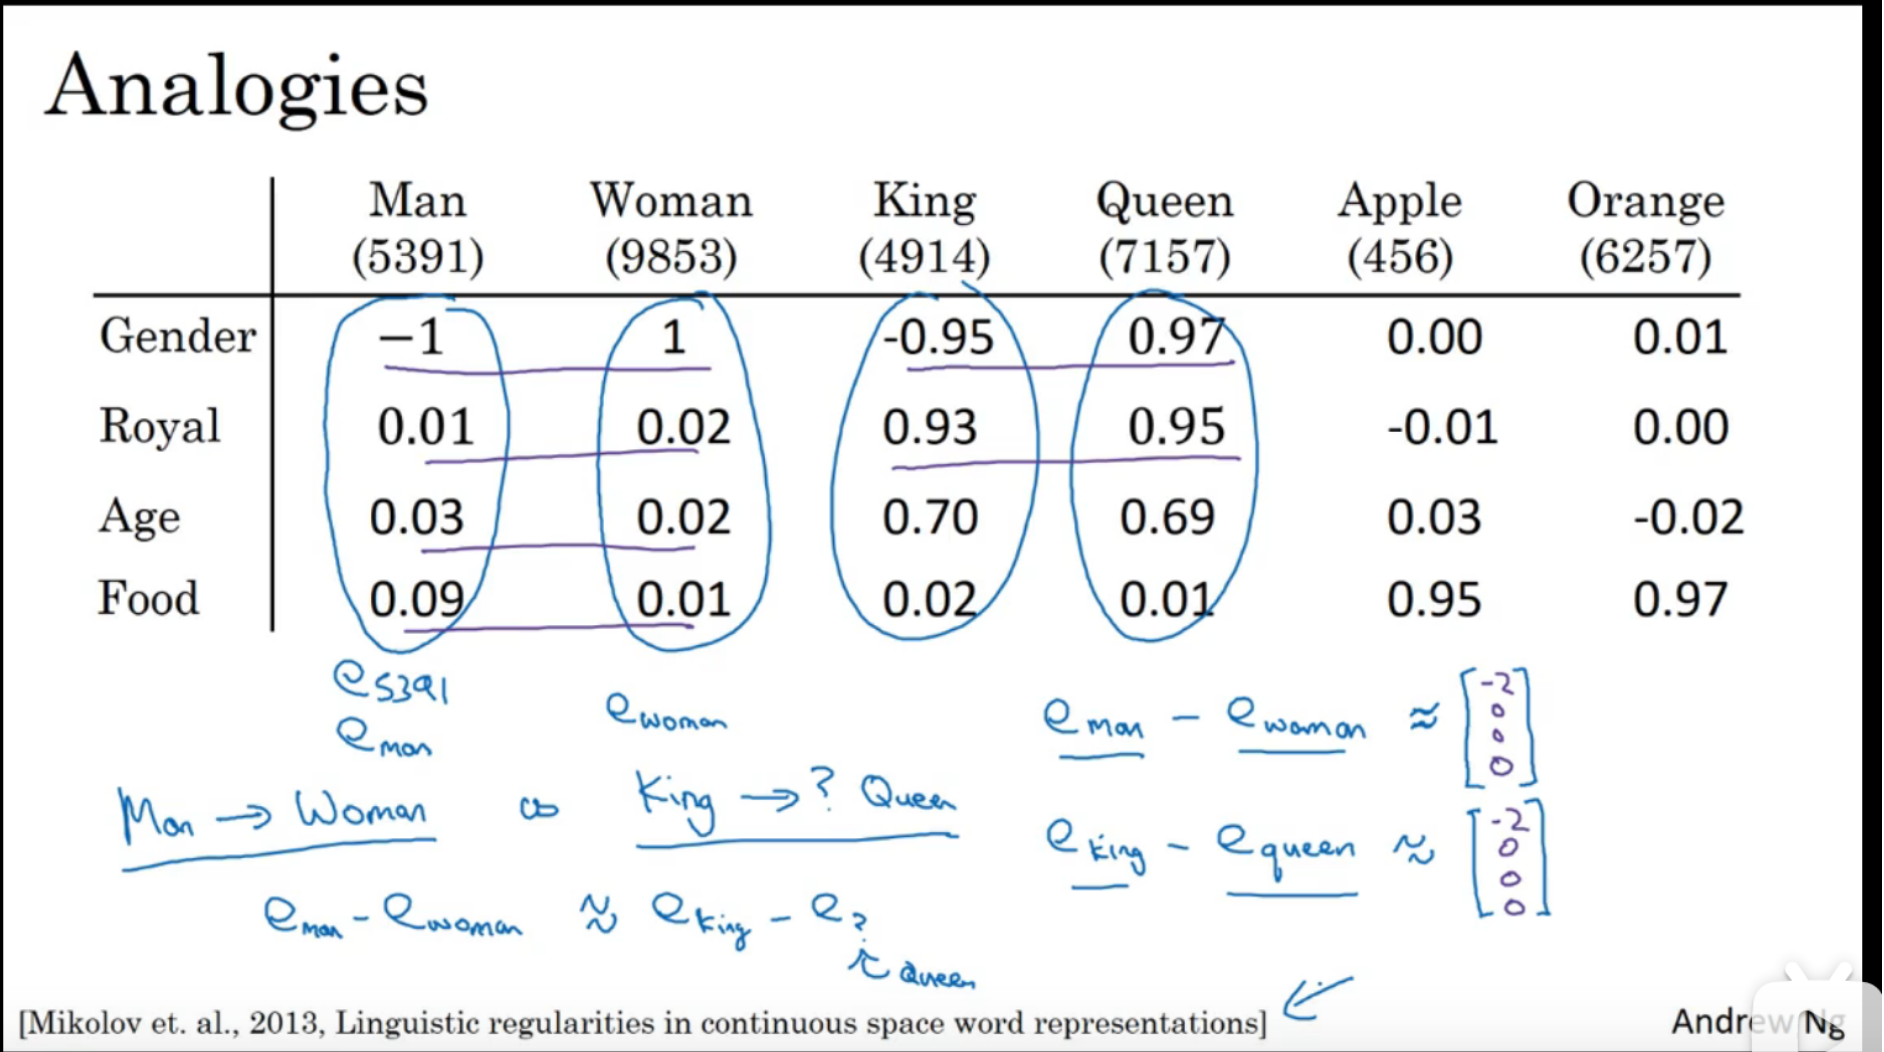

好像行列反了

## TimeDistributed

In [ ]:
tf.keras.layers.TimeDistributed(layer, **kwargs)

这个包装器允许对输入的每个时间片应用一个层。

每一个输入至少应该是三维的，第一个输入的索引一的尺寸将被视为时间尺寸。

考虑一个由32个视频样本组成的批次，每个样本是一个128x128的RGB图像，数据格式为channel_last，跨越10个时间段。批量输入的形状是（32，10，128，128，3）。

然后，你可以使用TimeDistributed将相同的Conv2D层独立地应用到10个时间步长中的每一个。

X = TimeDistributed(Dense(1, activation = "sigmoid"))(X)

每一个时间step都可以用同样的数据训练

## LSTM

In [6]:
tf.keras.layers.LSTM(
    units, activation='tanh', recurrent_activation='sigmoid',
    use_bias=True, kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros', unit_forget_bias=True,
    kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None,
    activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
    bias_constraint=None, dropout=0.0, recurrent_dropout=0.0,
    return_sequences=False, return_state=False, go_backwards=False, stateful=False,
    time_major=False, unroll=False, **kwargs
)

NameError: name 'tf' is not defined

return_sequences 是否返回最后的输出

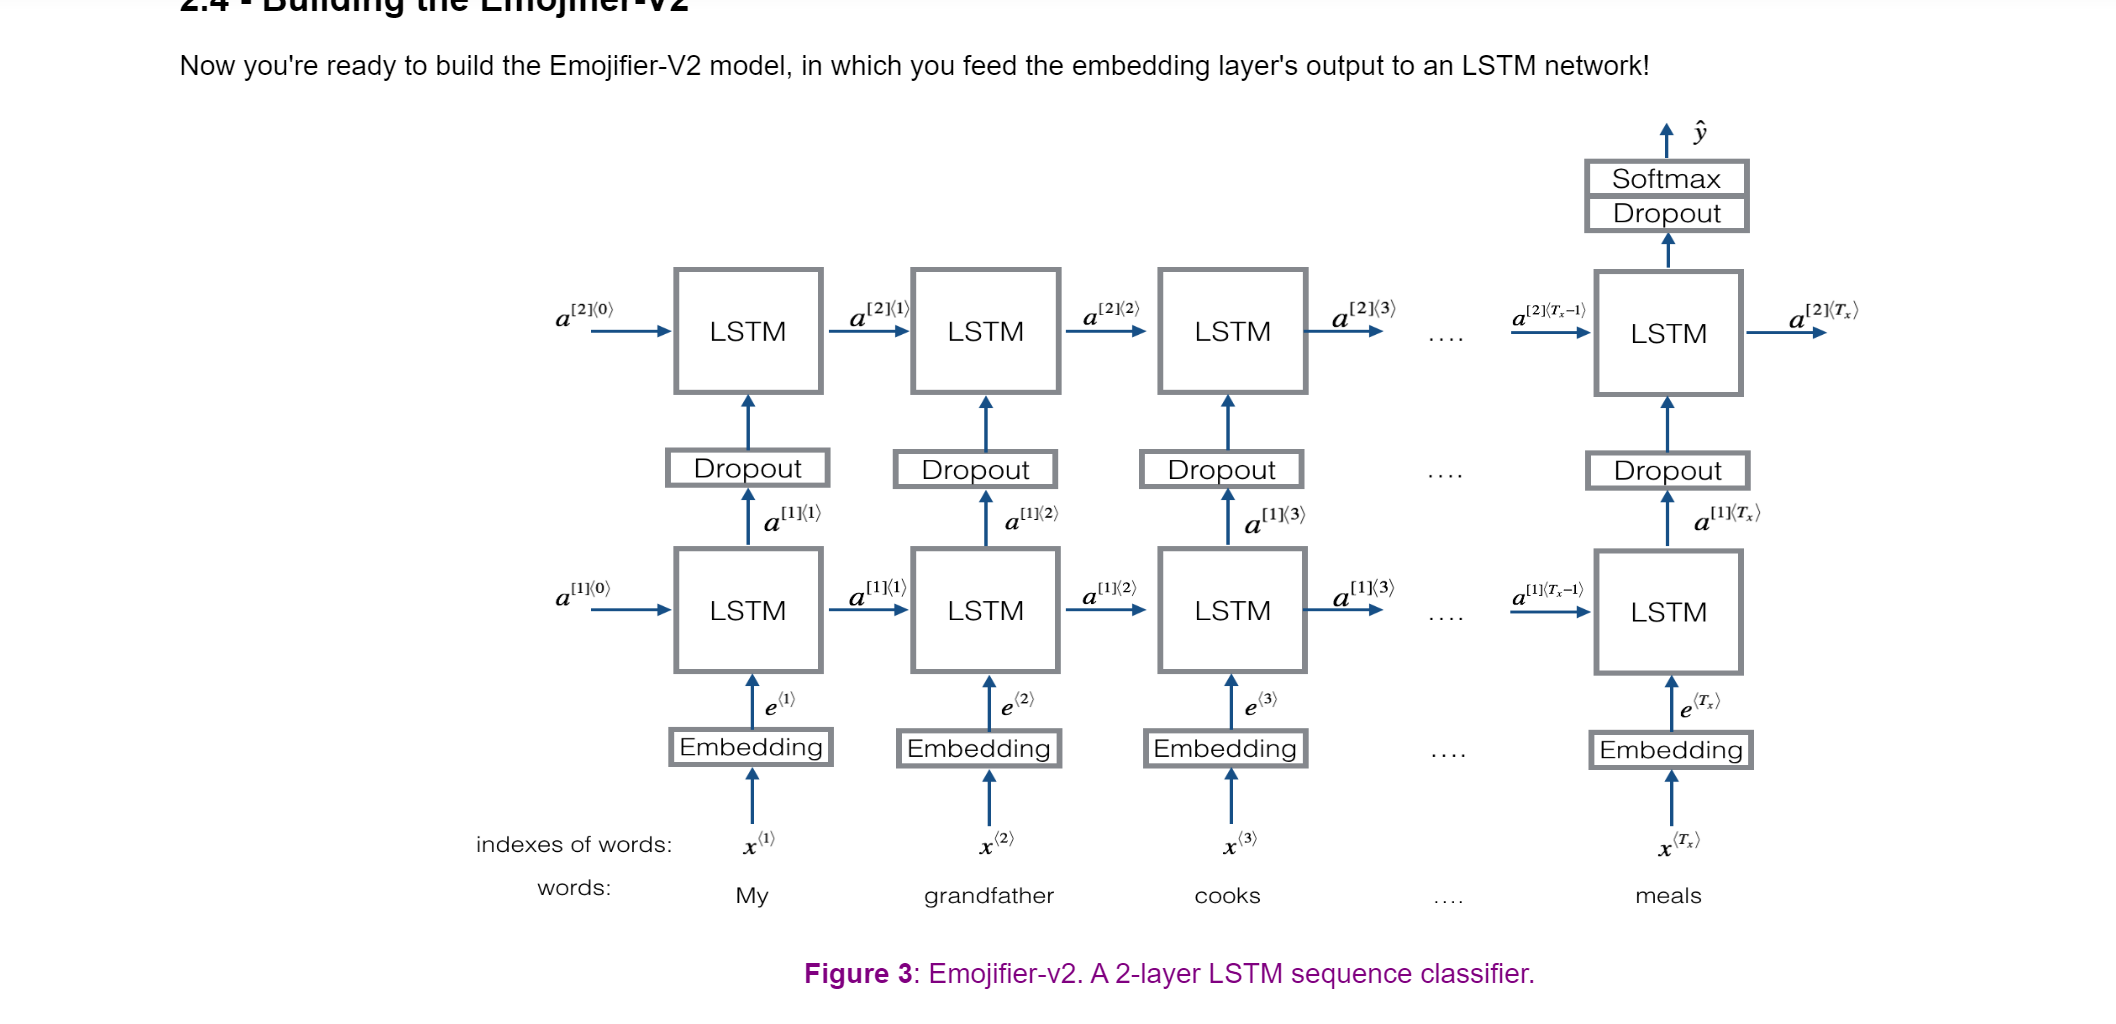

下面的LSTM是每个时间点都输出，所以return_sequences = True    
上面的LSTM是最后输出一个值，所以return_sequences = Fasle

## GRU

In [ ]:
tf.keras.layers.GRU(
    units, activation='tanh', recurrent_activation='sigmoid',
    use_bias=True, kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros', kernel_regularizer=None,
    recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, recurrent_constraint=None, bias_constraint=None,
    dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False,
    go_backwards=False, stateful=False, unroll=False, time_major=False,
    reset_after=True, **kwargs
)

## RepeatVector

In [ ]:
tf.keras.layers.RepeatVector(
    n, **kwargs
)

重复N遍输入值

## Concatenate

In [ ]:
tf.keras.layers.Concatenate(
    axis=-1, **kwargs
)

拼接输入值  
tf.keras.layers.Concatenate(axis=1)([x, y])

## Dot

In [ ]:
tf.keras.layers.Dot(
    axes, normalize=False, **kwargs
)

In [12]:
import tensorflow as tf
import numpy as np
x = np.arange(10).reshape(1, 5, 2)
y = np.arange(10, 20).reshape(1, 2, 5)
tf.keras.layers.Dot(axes=(1, 2))([x, y])

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[260, 360],
        [320, 445]]])>

矩阵乘积

## math

### add

In [18]:
tf.math.add(
    x, y, name=None
)

NameError: name 'x' is not defined

### reduce_sum

降维求和

In [17]:
tf.math.reduce_sum(
    input_tensor, axis=None, keepdims=False, name=None
)

NameError: name 'input_tensor' is not defined

### square

In [16]:
tf.math.square(
    x, name=None
)

NameError: name 'x' is not defined

### subtract

In [15]:
tf.math.subtract(
    x, y, name=None
)

NameError: name 'x' is not defined

### maximum

In [14]:
tf.math.maximum(
    x, y, name=None
)

NameError: name 'x' is not defined

## evaluate

happy_model.evaluate(X_test, Y_test)

In [61]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 32ms/step - loss: 0.2044 - accuracy: 0.9000


[0.2043507695198059, 0.8999999761581421]

## exmpale 

### 函数

In [13]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    # Z1 = None
    ## RELU
    # A1 = None
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    # P1 = None
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    # Z2 = None
    ## RELU
    # A2 = None
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    # P2 = None
    ## FLATTEN
    # F = None
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    # outputs = None
    # YOUR CODE STARTS HERE
    Z1 = tfl.Conv2D(8, (4,4), strides=(1, 1), padding='SAME')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8,8), padding='SAME')(A1)
    Z2 = tfl.Conv2D(16, (2,2), strides=(1, 1), padding='SAME')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4,4), padding='SAME')(A2)
    F  = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation='softmax')(F)
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

NameError: name 'X_train' is not defined

### 序列

In [16]:
# GRADED FUNCTION: happyModel

def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
#             ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tfl.ZeroPadding2D(padding=3,input_shape=(64,64,3)),
#             ## Conv2D with 32 7x7 filters and stride of 1
            tfl.Conv2D(32, (7,7), strides=(1, 1)),
#             ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis=3),
#             ## ReLU
            tfl.ReLU(),
#             ## Max Pooling 2D with default parameters
            tfl.MaxPool2D(),
#             ## Flatten layer
            tfl.Flatten(),
#             ## Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(1, activation='sigmoid')
    ])
            # YOUR CODE STARTS HERE
#     model = tf.keras.Sequential()
#     model.add(tfl.ZeroPadding2D(padding=3)(tf.keras.Input((64,64,3))))   
            
            # YOUR CODE ENDS HERE

    
    return model

# Regression

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## 生成点的数据

### 聚类的散点

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

sklearn.datasets.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(- 10.0, 10.0), shuffle=True, random_state=None, return_centers=False)

n_samples: 点的数量  
n_features: 点的特征数，就是X的列数  
centers: 中心点数量，默认为3  

return 的值：
* X(n_samples,n_features) 返回的是维度值
* y(n_samples) 返回的是标签值
* centers(n_samples,n_features)(当return_centers=True的时候会返回)

In [17]:
X, y, centers = make_blobs(n_samples=100, centers=3, n_features=2,random_state=0,return_centers=True)

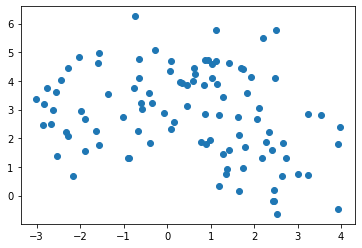

In [18]:
plt.scatter(X[:,0],X[:,1])

In [19]:
centers

array([[ 0.97627008,  4.30378733],
       [ 2.05526752,  0.89766366],
       [-1.52690401,  2.91788226]])

### 圆的散点

factor: Scale factor between inner and outer circle in the range (0, 1)  
noise: Standard deviation of Gaussian noise added to the data

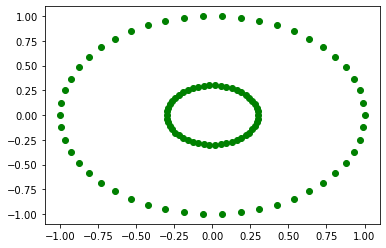

In [183]:
# import generator and create data
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, factor=.3) # factor determines the gap between circles

# visualise data using Matplotlib
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], color = 'g') 
plt.show() 

## 生成数字图片

In [207]:
from sklearn.datasets import load_digits

In [208]:
digits = load_digits()
# show the shape of data set (rows x columns)
digits.data.shape

(1797, 64)

In [209]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

### 像素画图

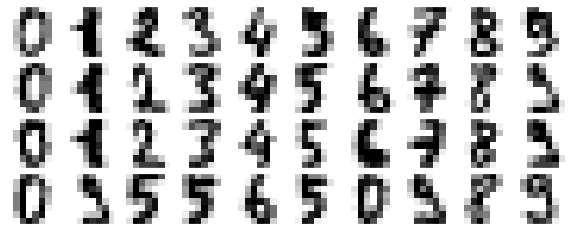

In [210]:
# helper function to print the digits to screen
def plot_digits(data):
	fig, axes = plt.subplots(4, 10, figsize=(10, 4),
							 subplot_kw={'xticks':[], 'yticks':[]},
							 gridspec_kw=dict(hspace=0.1, wspace=0.1))
	for i, ax in enumerate(axes.flat):
		ax.imshow(data[i].reshape(8, 8),
			  cmap='binary', interpolation='nearest',clim=(0, 16))
# print to screen
plot_digits(digits.data)

## 理论 

### 基本语法

In [116]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
 
# 直接加载数据集
loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target
 
# 定义模型model
model = LinearRegression()
# l1_model = Lasso(alpha=0.5)
# l2_model = Ridge(alpha=0.5)
# enet_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
# 不同的模型就修改这里

# 学习参数
model.fit(data_X, data_y)

# 输出权重weight
print (model.coef_)

# 输出偏置bias
print (model.intercept_)

# 输出model定义时的参数, 没有给定则返回默认参数
print (model.get_params())

# print (model.score(Xtest,Ytest))
# 这里的score返回的是R**2 的结果

# 评估学习到的模型
# 通过coefficient of determination(决定系数),来判断回归方程拟合的程度.


[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.45948838508993
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


### 多元线性回归

OLS方法

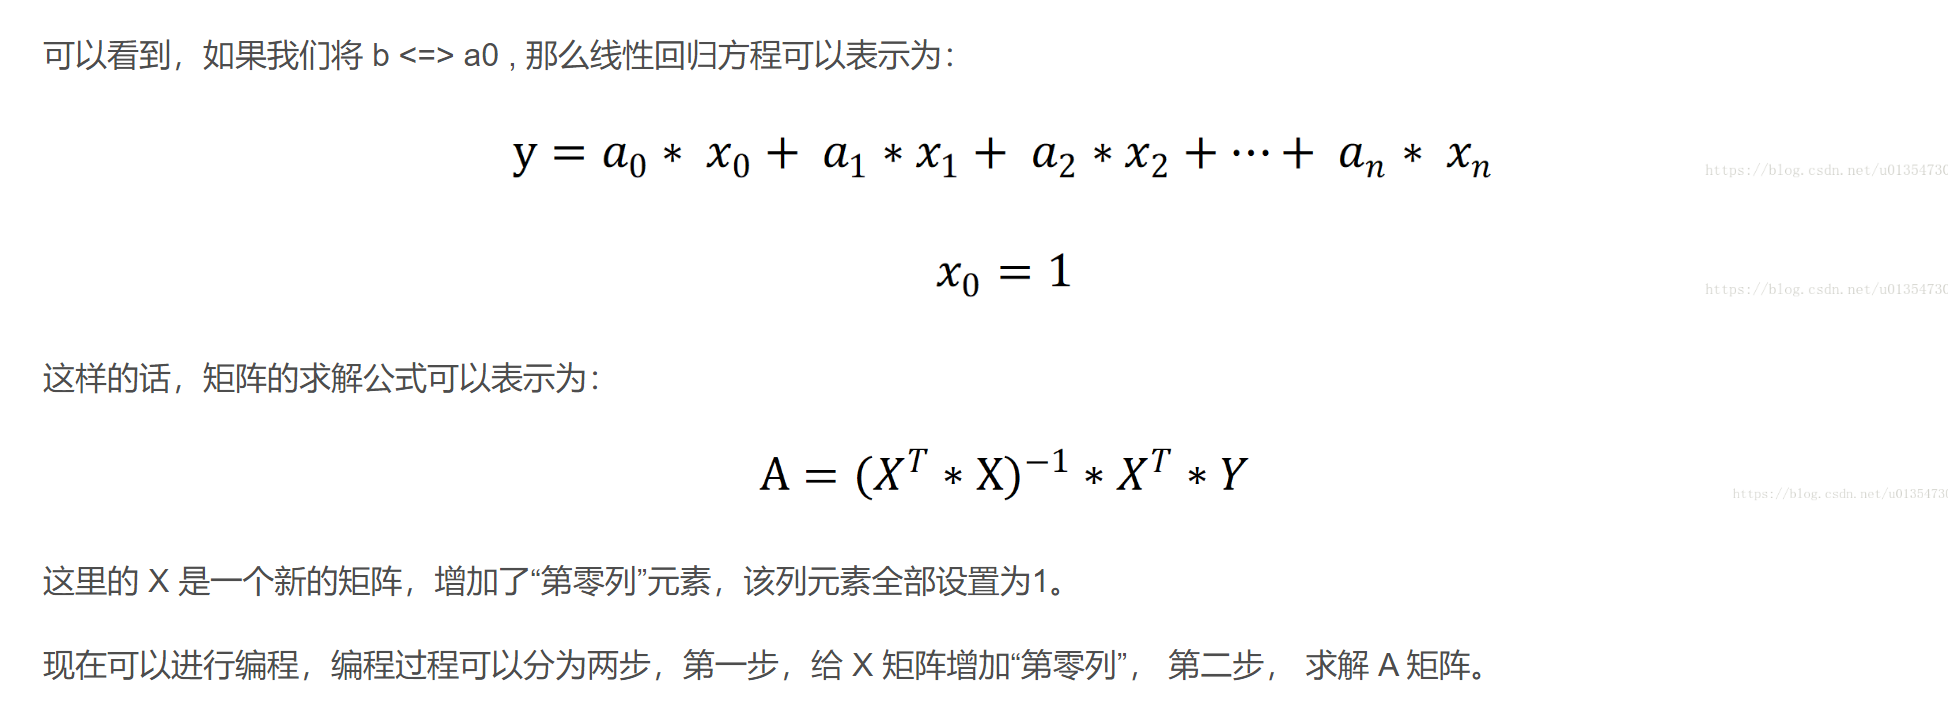

In [173]:
x1 = np.array(np.arange(10))
y = np.array(0.8*np.arange(10)+50*np.random.rand())

In [185]:
x1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [174]:
x2 = np.array([1]*10)
x2 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [175]:
x = np.array([x1,x2]).T
x

array([[0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [4, 1],
       [5, 1],
       [6, 1],
       [7, 1],
       [8, 1],
       [9, 1]])

In [176]:
y

array([ 5.53690379,  6.33690379,  7.13690379,  7.93690379,  8.73690379,
        9.53690379, 10.33690379, 11.13690379, 11.93690379, 12.73690379])

In [177]:
k,b = np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))

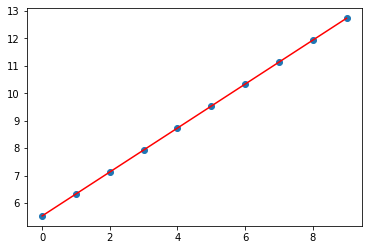

In [178]:
import matplotlib.pyplot as plt 
plt.scatter(x1,y)
plt.plot(x1,k*x1+b,c='red')

In [180]:
import statsmodels.api as sm
est = sm.OLS(y, sm.add_constant(x1)).fit()

In [184]:
print(est.params)
print(k,b)

[5.53690379 0.8       ]
0.7999999999999989 5.536903788254531


### MSE/RMSE/$R^2$

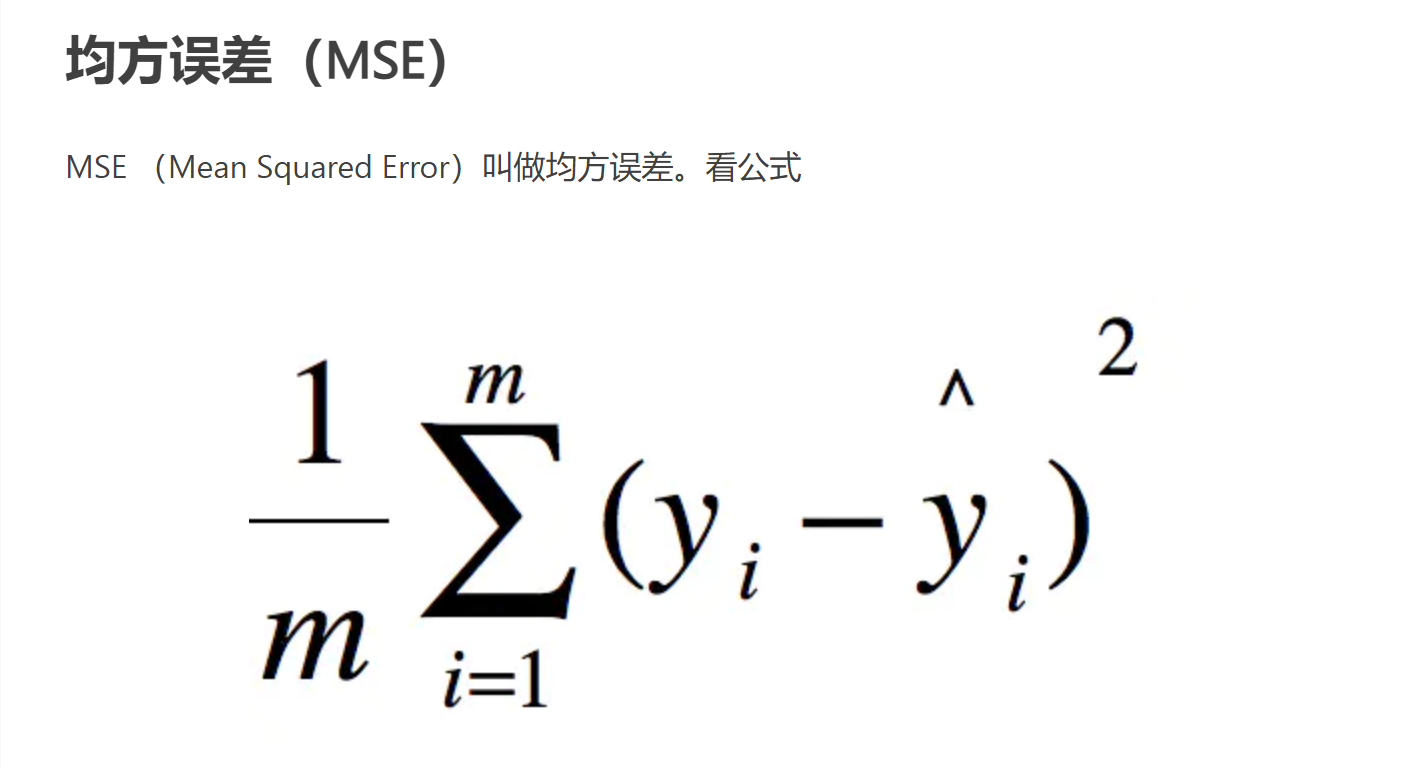

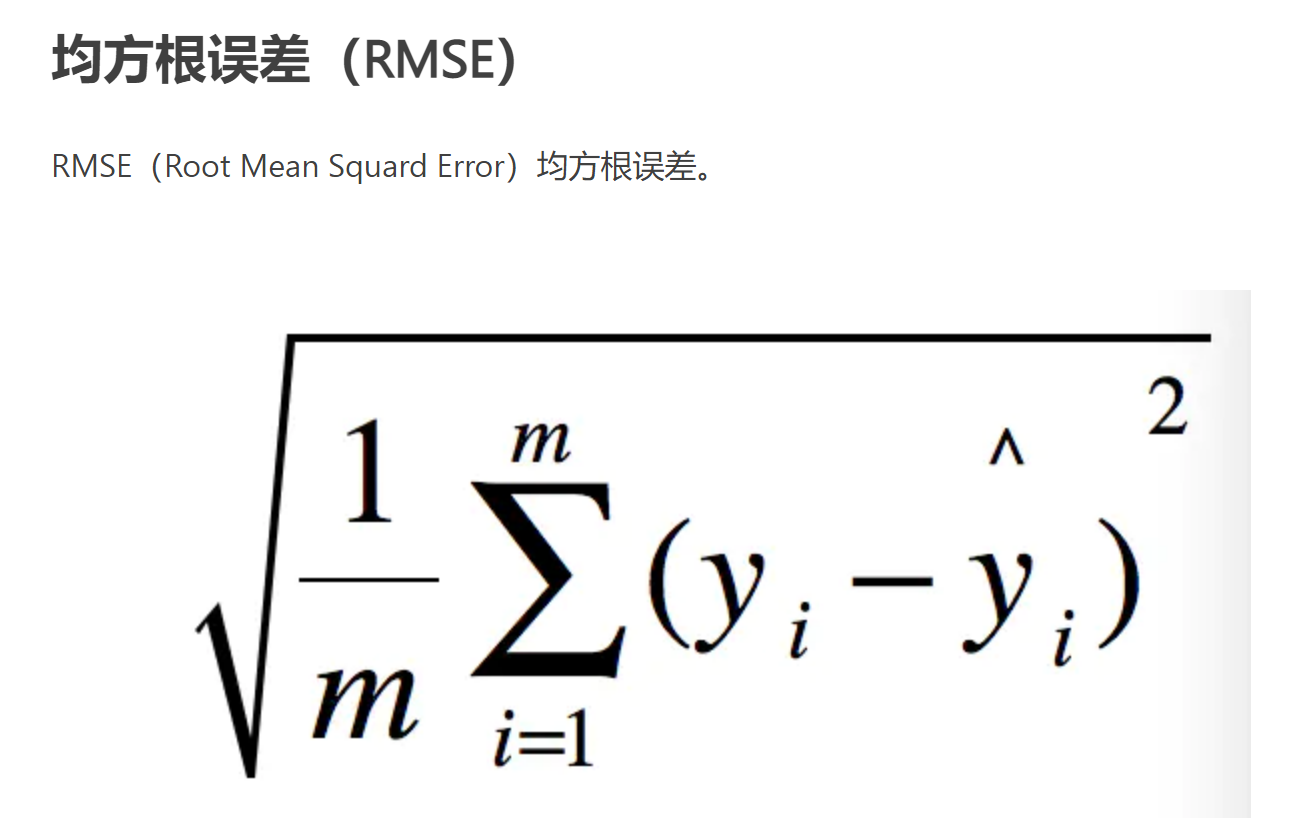

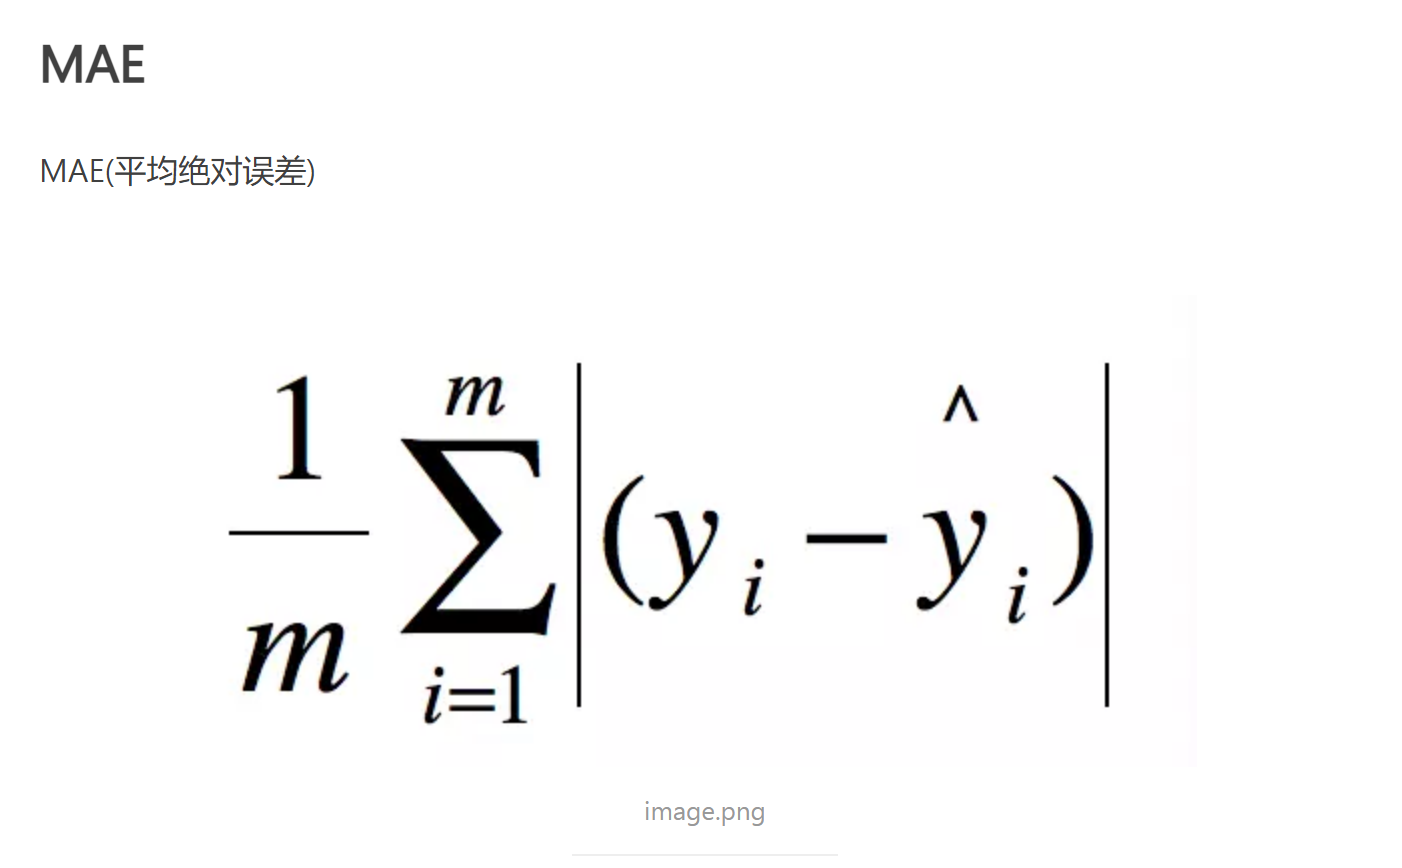

R-squared  
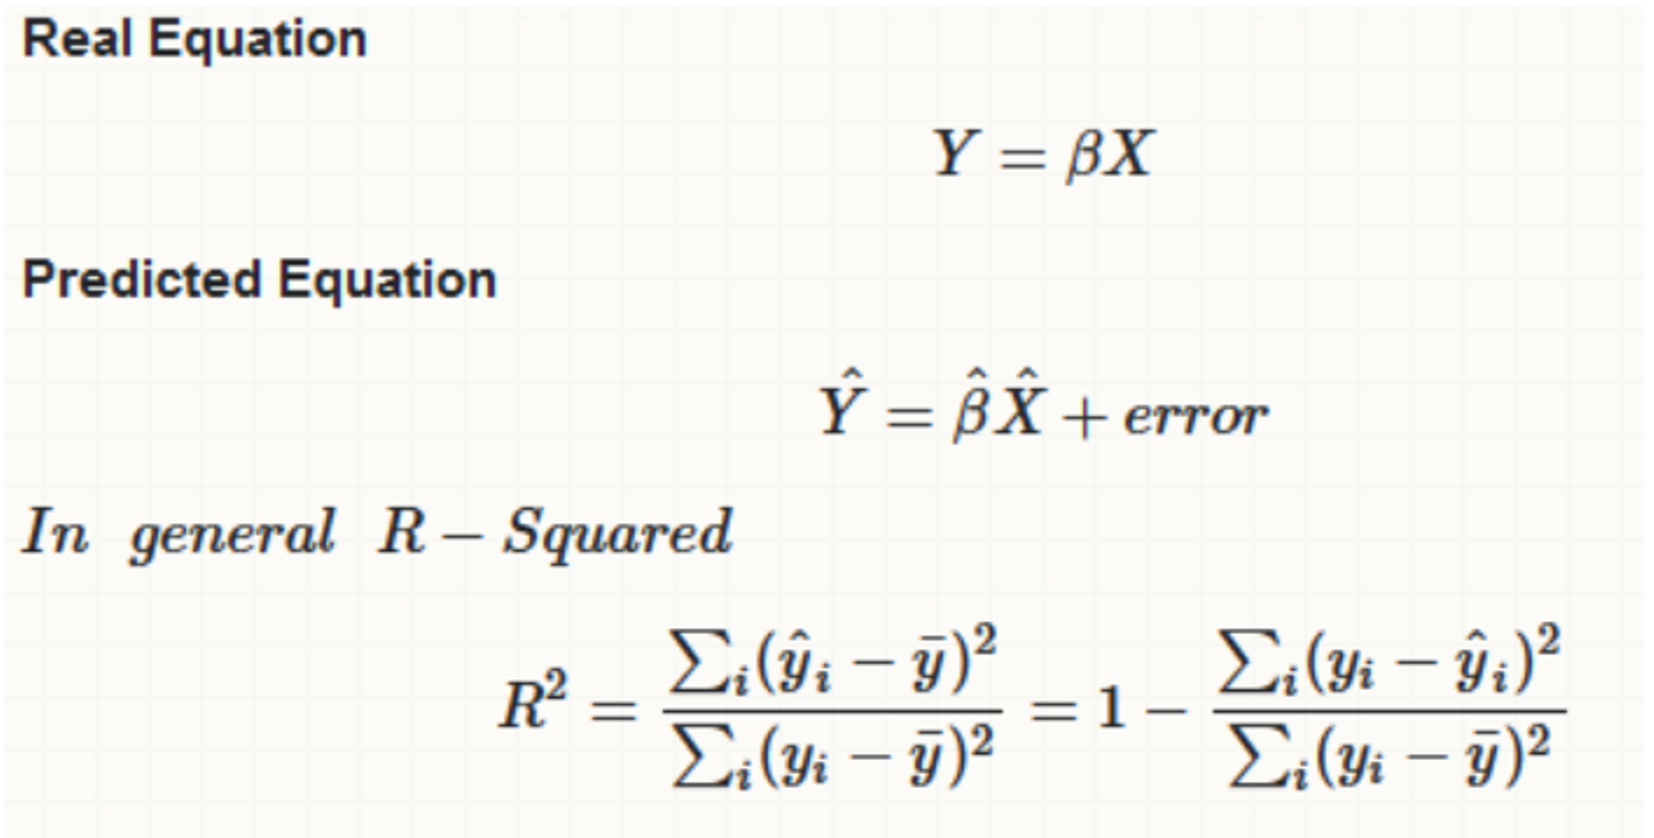

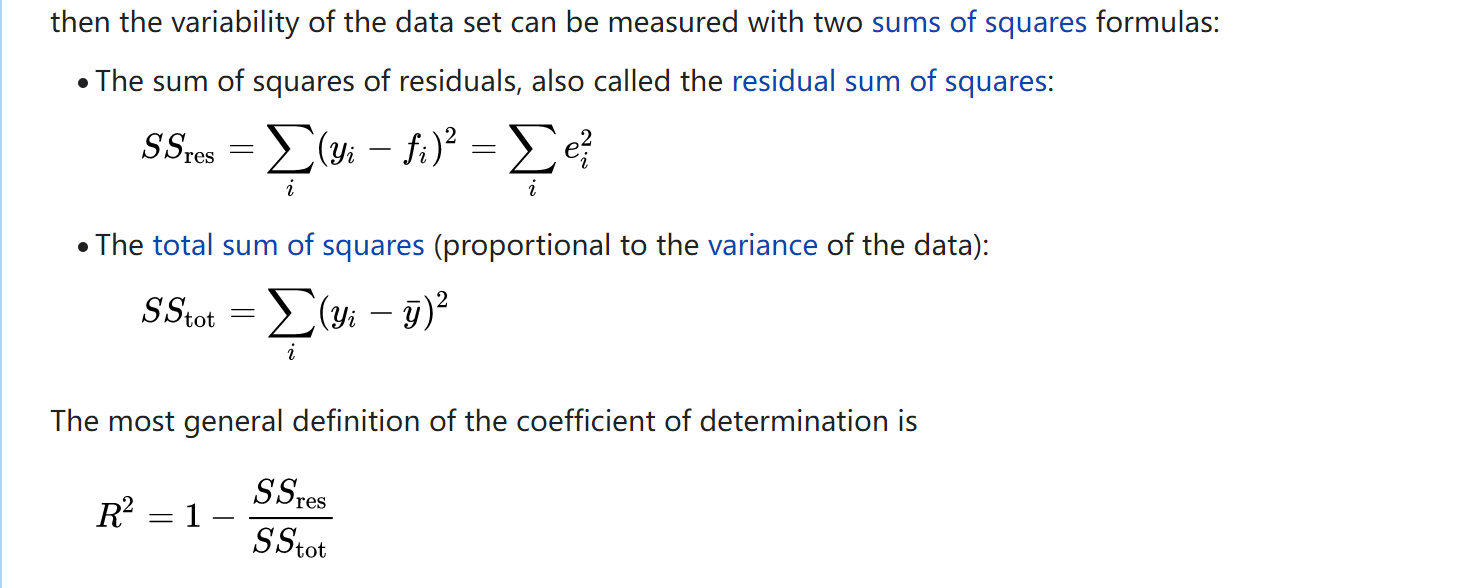

这里的f就是y的预测值$\hat{y}$

In [17]:
# RMSE算法
total = 0
for i in range(len(boston_Y)):
    total+=(boston_Y[i]-boston_predict[i])**2
np.sqrt(total/len(boston_Y))

4.679191295697282

In [19]:
# R-squared
total1 = total2 = 0
for i in range(len(boston_Y)):
    total1 += (boston_Y[i]-boston_predict[i])**2
    total2 += (boston_Y[i]-np.mean(boston_Y))**2
1-total1/total2

0.7406426641094095

### L1/L2/ElasticNet 正则

In [60]:
from sklearn.linear_model import Lasso
l1_model = Lasso(alpha=0.5)

# fit the model to the training data
l1_model_fit = l1_model.fit(X_train, Y_train)

# predict the data
boston_predict = l1_model_fit.predict(X_test)

# calculate RMSE (root mean square error) and R^2 (predictive power)
from sklearn.metrics import mean_squared_error, r2_score
rmse = (np.sqrt(mean_squared_error(Y_test, boston_predict)))
r2 = r2_score(Y_test, boston_predict)

# print the performance metrics
print("Model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Model performance
--------------------------------------
RMSE is 4.641807937886982
R2 score is 0.7547733284211173




In [64]:
from sklearn.linear_model import Ridge
l2_model = Ridge(alpha=0.5)

# fit the model to the training data
l2_model_fit = l2_model.fit(X_train, Y_train)

# predict the data
boston_predict = l2_model_fit.predict(X_test)

# calculate RMSE (root mean square error) and R^2 (predictive power)
from sklearn.metrics import mean_squared_error, r2_score
rmse = (np.sqrt(mean_squared_error(Y_test, boston_predict)))
r2 = r2_score(Y_test, boston_predict)

# print the performance metrics
print("Model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Model performance
--------------------------------------
RMSE is 4.296716746858945
R2 score is 0.7898802773164533




In [66]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet(alpha=0.5, l1_ratio=0.5)

# fit the model to the training data
enet_model_fit = enet_model.fit(X_train, Y_train)

# predict the data
boston_predict = enet_model_fit.predict(X_test)

# calculate RMSE (root mean square error) and R^2 (predictive power)
from sklearn.metrics import mean_squared_error, r2_score
rmse = (np.sqrt(mean_squared_error(Y_test, boston_predict)))
r2 = r2_score(Y_test, boston_predict)

# print the performance metrics
print("Model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Model performance
--------------------------------------
RMSE is 4.746576416274428
R2 score is 0.7435785663605581




### 标准化数据/normalisation

均值标准化/最大最小值标准化/RobustScaler标准化

如果scale明显不同或者有一部分相似，可以使用标准化  
如果scale很相似，或者有一些原因不这样做，就不要使用标准化

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

df = pd.DataFrame({"a": [1,2,3,4,5], "salary": [100000, 100, 20000, 0, 123456]})
print(df)
print("\n")

# mean normalisation
df["salary"] = (df["salary"] - df["salary"].mean()) / df["salary"].std()
print("Mean normalised")
print(df)
print("\n")

# min-max normalisation (feature scaling)
from sklearn.preprocessing import MinMaxScaler
df = pd.DataFrame({"a": [1,2,3,4,5], "salary": [100000, 100, 20000, 0, 123456]})
minmaxscaler = MinMaxScaler()
tmp = minmaxscaler.fit_transform(df)
df["salary"] = (df["salary"] - df["salary"].min()) / (df["salary"].max() -df["salary"].min())
print("Min/max normalised")
print(tmp)
print(df)
print("\n")

# robust scaling (via scikit-learn)
# Similar to min-max but uses IQR so is robust to outliers
from sklearn.preprocessing import RobustScaler

df = pd.DataFrame({"a": [1,2,3,4,5], "salary": [100000, 100, 20000, 0, 123456]})

scaler = RobustScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=['a', 'salary'])

print(df)

   a  salary
0  1  100000
1  2     100
2  3   20000
3  4       0
4  5  123456


Mean normalised
   a    salary
0  1  0.873912
1  2 -0.828288
2  3 -0.489211
3  4 -0.829992
4  5  1.273579


Min/max normalised
[[0.00000000e+00 8.10005184e-01]
 [2.50000000e-01 8.10005184e-04]
 [5.00000000e-01 1.62001037e-01]
 [7.50000000e-01 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00]]
   a    salary
0  1  0.810005
1  2  0.000810
2  3  0.162001
3  4  0.000000
4  5  1.000000


     a    salary
0 -1.0  0.800801
1 -0.5 -0.199199
2  0.0  0.000000
3  0.5 -0.200200
4  1.0  1.035596


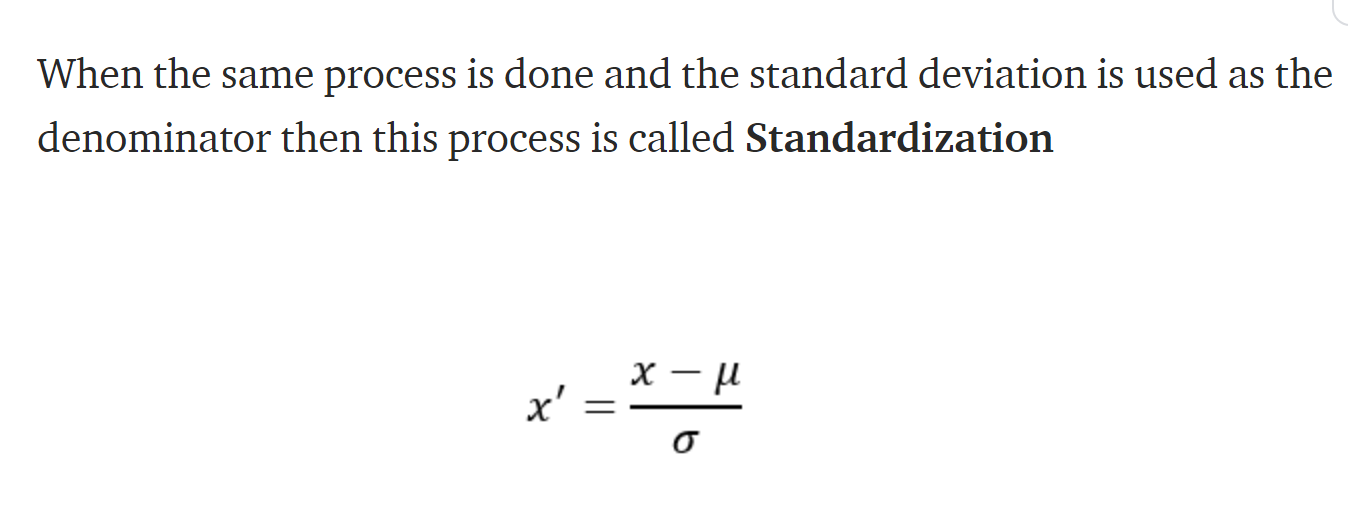

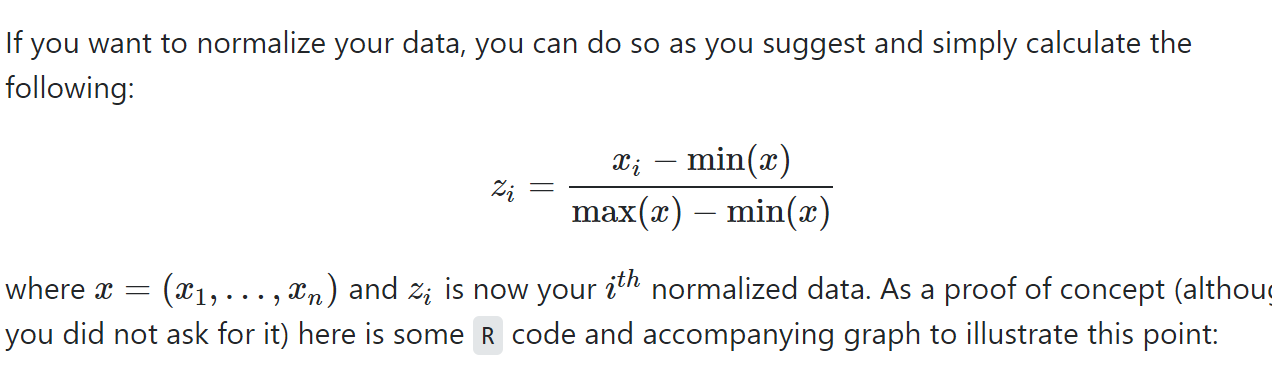

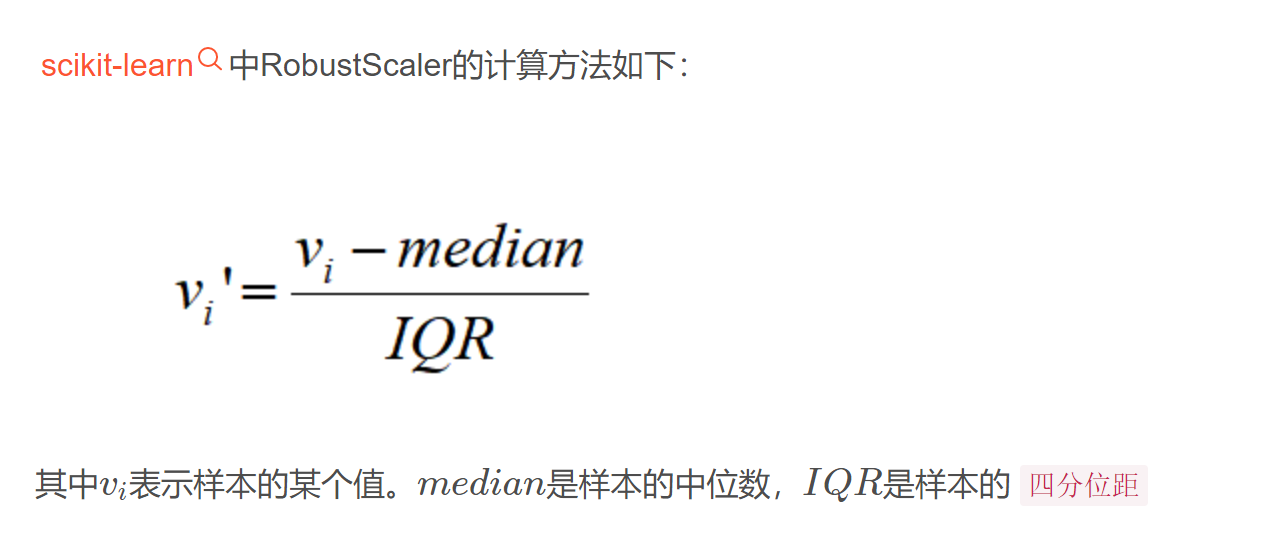

$IQR = Q_3 - Q_1$

### 决策树

In [117]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier as DTC

import pandas as pd
import numpy as np

# import the data
data = load_breast_cancer()
data

# create a DataFrame of features
cancer_df = pd.DataFrame(data.data, columns=data.feature_names)
cancer_df.head()

# normalise the data
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df = scaler.fit_transform(cancer_df)
cancer_df = pd.DataFrame(df, columns=data.feature_names)
cancer_df.head()

# create a target variable
cancer_target = data.target
cancer_target

# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cancer_df, cancer_target, test_size = 0.2)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# fit a decision tree to the training data
# tree_model = DTC(criterion,max_depth,min_samples_split,min_samples_leaf,max_features)
# max_features是每个节点分出来的最大特征值
tree_model = DTC()
tree_model_fit = tree_model.fit(X_train, Y_train)

# get the accuracy score of the test data
tree_model_fit.score(X_test, Y_test)

(455, 30)
(114, 30)
(455,)
(114,)


0.9210526315789473

### 调参包

In [118]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]

scores = ['accuracy', 'f1_macro']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(DTC(), tuned_parameters, cv=5,
                       scoring= score)
    # (模型，调参的数据(格式为字典/列表)，k折验证，score的评分方式)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for accuracy


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 7}


# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_split': 3}




In [29]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

In [34]:
print(X.shape)
print(y.shape)

(50, 10)
(50,)


In [43]:
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
selector.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [44]:
selector.ranking_

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

### KMeans

对于Kmeans来说，聚类之前先标准化数据！

如果2个特征，前面1个特征scale大，后面1个特征scale小，第一个特征对结果的影响会很大

#### 包

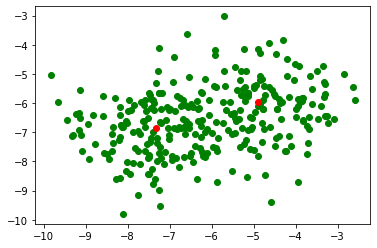

In [78]:
# import the data generator
from sklearn.datasets import make_blobs

# create a dataset. X is a set of values to cluster; Y is the cluster they belong to
X, y, centers = make_blobs(n_samples=300, n_features=2, centers=2,return_centers=True)

# visualise the data in Matplotlib
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], color = 'g')
plt.scatter(centers[:,0],centers[:,1],c = 'r')
plt.show()  

In [79]:
# min-max scale the X data so it takes values between zero (min value) and one (max value)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X) # transform the data
# import and fit the clustering algorithm
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=2).fit(X)

<AxesSubplot:xlabel='x1', ylabel='x2'>

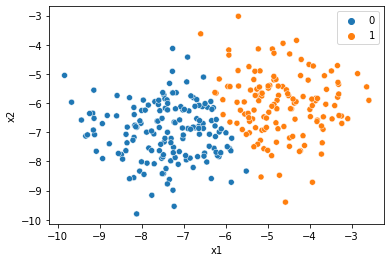

In [84]:
# add the data and the assigned cluster labels to a Pandas dataframe
import pandas as pd
df = pd.DataFrame(data={'x1': X[:, 0], 'x2': X[:, 1], 'label': clustering.labels_})  
# 这里的labels_在官网的attributes介绍里面

# visualise the data using Seaborn
import seaborn as sns
sns.scatterplot(data=df, x='x1', y='x2', hue=df.label.to_list()) # note: we use the “to_list()” function to fix the labels to hue

In [85]:
clustering.cluster_centers_

array([[-7.40256614, -6.96923788],
       [-4.66850039, -6.03281193]])

In [86]:
centers

array([[-4.89726902, -5.94662124],
       [-7.33375994, -6.86068226]])

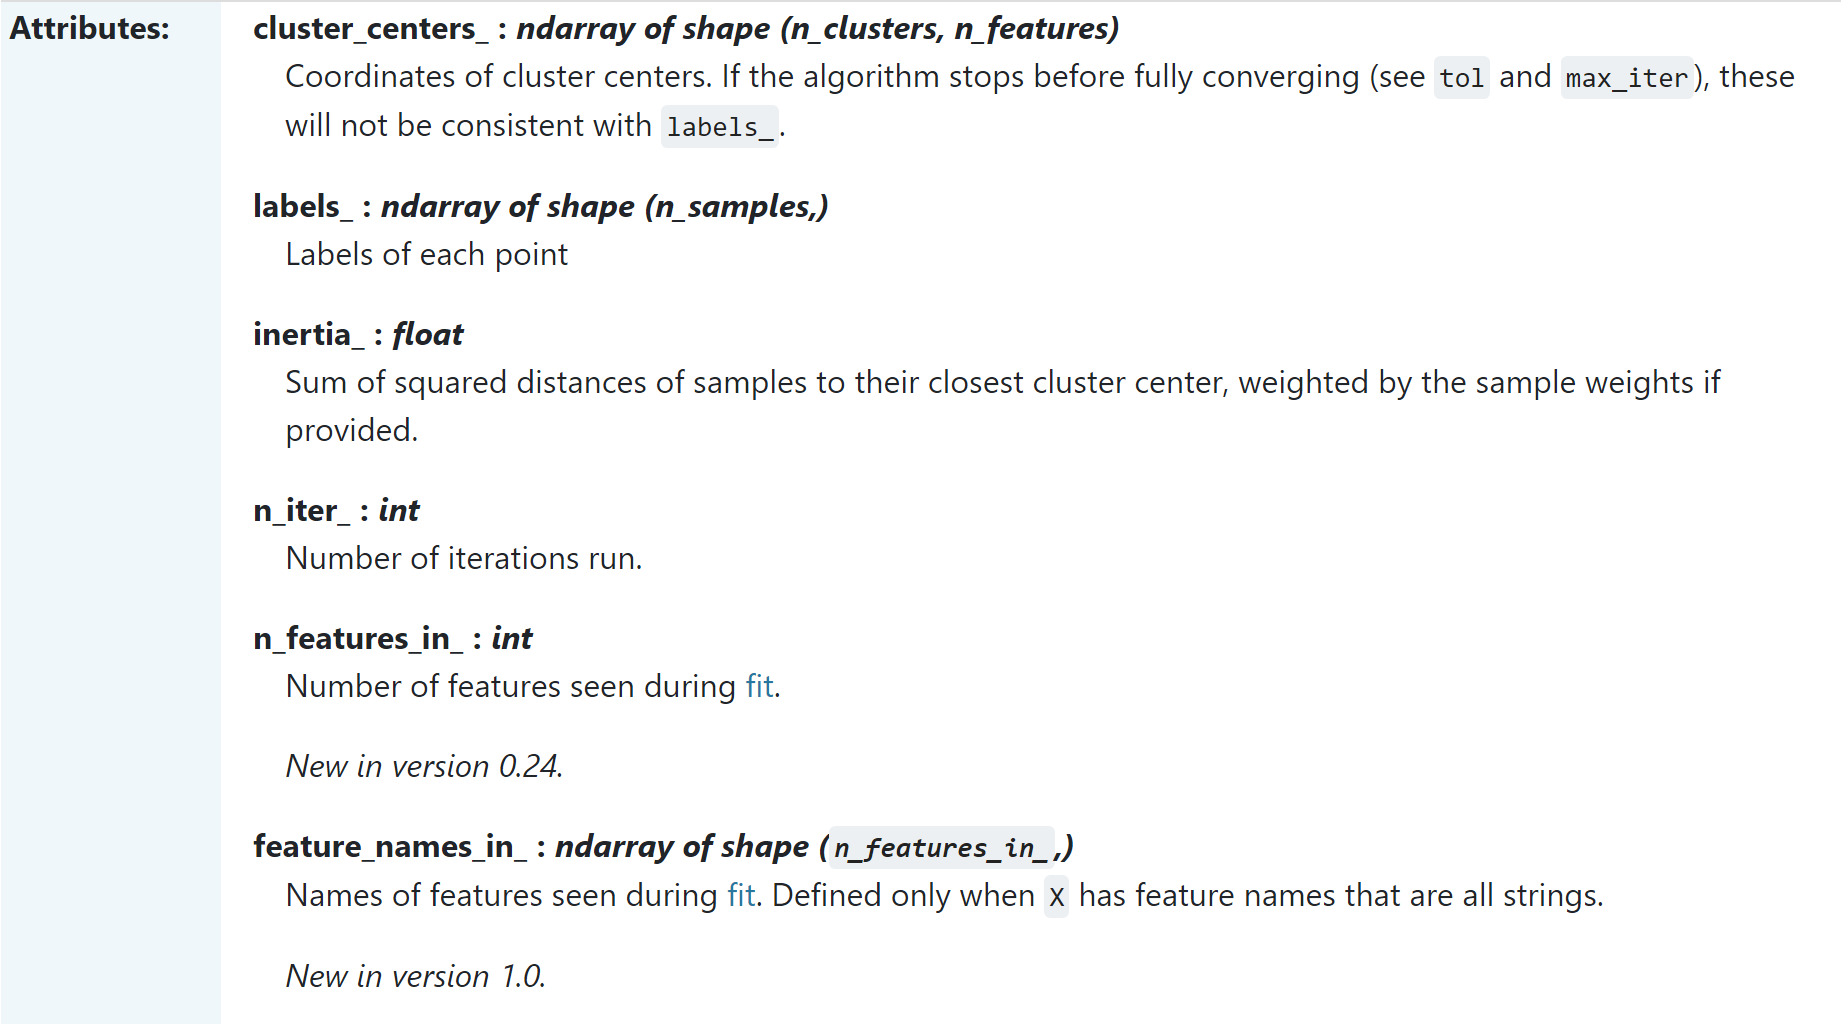

#### 手撕

In [181]:
def distance_lyp(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def kmeans_lyp(x):
    rows,columns = x.shape
    centers = np.random.randint(0,rows,2)
    pos_center1 = np.array(x[centers[0]])
    pos_center2 = np.array(x[centers[1]])
    for i in range(30):
        for i in range(rows):
            center1_distance = distance_lyp(x[i],x[centers[0]])
            center2_distance = distance_lyp(x[i],x[centers[1]])
            if center1_distance <= center2_distance:
                pos_center1 = np.vstack((pos_center1,x[i]))
            else:
                pos_center2 = np.vstack((pos_center2,x[i]))
        pos_center1 = np.array((np.mean(pos_center1[1:][:,0]),np.mean(pos_center1[1:][:,1])))
        pos_center2 = np.array((np.mean(pos_center2[1:][:,0]),np.mean(pos_center2[1:][:,1])))

    return [pos_center1,pos_center2]

In [182]:
kmeans_lyp(X)

[array([-7.02556009, -6.11455974]), array([-5.25890338, -6.9801887 ])]

### DBSCAN

密度聚类算法

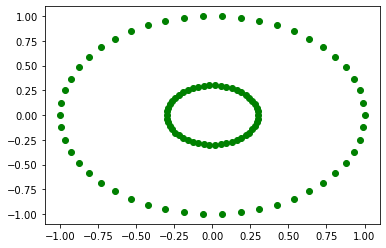

In [184]:
# import generator and create data
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, factor=.3) # factor determines the gap between circles

# visualise data using Matplotlib
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], color = 'g') 
plt.show() 

* eps参数：两个点之间的最大距离，如果较大聚类数量少，较小的话聚类数量多
* min_samples: 邻域内的样本数，成为核心点的最少数量

<AxesSubplot:xlabel='x1', ylabel='x2'>

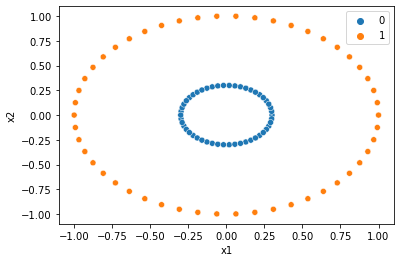

In [192]:
# import and fit DBSCAN clustering to the data
from sklearn.cluster import dbscan
clustering = dbscan(X)
# create a Pandas dataframe containing X and the cluster label
import pandas as pd
df = pd.DataFrame(data={'x1': X[:, 0], 'x2': X[:, 1], 'label': clustering[1]})

# visualising the cluster analysis using Seaborn
import seaborn as sns
sns.scatterplot(data=df, x='x1', y='x2', hue=df.label.to_list())

### PCA

sklearn.decomposition.PCA(n_components=None)

* n_components 需要保留的维度数量

.componants (n_components, n_features)空间中的主轴，代表着方差最大的方向  
.explained_variance_(n_components,) 成分的方差量  
.explained_variance_ratio_ pca每一次降维所保存的差异性

* .fit(X) 指的是对X进行训练，得到一些X的属性  
* .transform(x2) 指的是根据训练集X的属性，对x2数据集进行降维
* .fit_transform(X) 指的是得到X的属性后对X进行处理  
* .inverse_transform(X) 指的是将降维后的结果还原为原来的shape，但是因为损失了信息，所以不是完全一样的

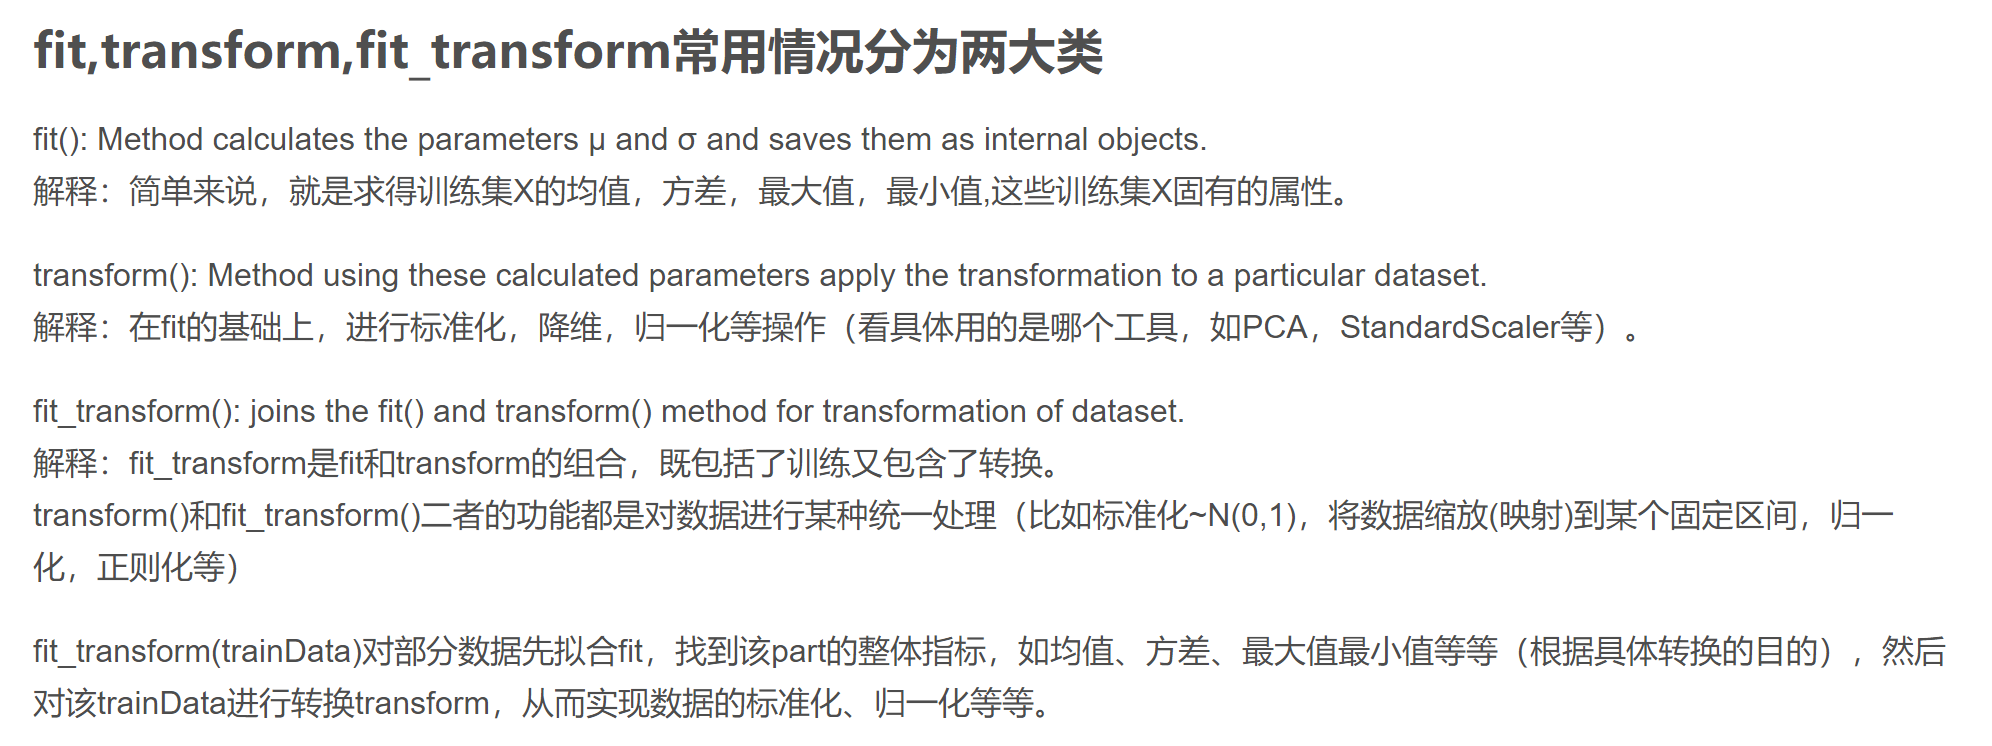

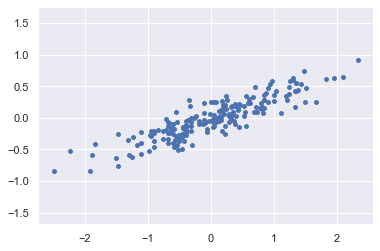

In [223]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

# PART ONE
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1],s=15)
plt.axis('equal');

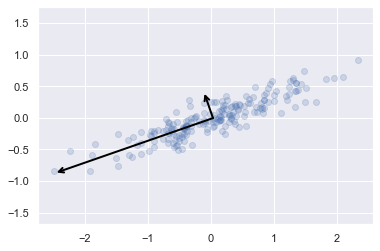

In [224]:
pca = PCA(n_components=2)
pca.fit(X)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color='black',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [225]:
pca = PCA(n_components=1)
# pca = PCA(n_components=None)
transformed = pca.fit_transform(X)
transformed

array([[ 6.76769235e-01],
       [-1.07121393e+00],
       [ 7.27912364e-01],
       [ 2.30964136e+00],
       [ 6.30052323e-01],
       [ 1.02448887e+00],
       [ 7.77183507e-01],
       [-1.39656414e+00],
       [-2.91049874e-01],
       [ 1.88864221e+00],
       [-7.11544293e-01],
       [ 6.38884130e-01],
       [ 5.48059617e-01],
       [-2.19312436e-01],
       [-3.87789490e-01],
       [ 7.15219956e-01],
       [-1.08373816e+00],
       [-2.99917403e-01],
       [-7.96849021e-01],
       [-8.12568346e-01],
       [-1.54018281e+00],
       [-2.52920476e-01],
       [ 6.26464454e-01],
       [-1.61007571e+00],
       [ 5.04240563e-01],
       [ 5.53935753e-01],
       [ 6.81911252e-01],
       [-2.00157228e-02],
       [ 1.13550833e-01],
       [ 2.92286085e-02],
       [-2.14393483e-01],
       [-1.03406124e+00],
       [ 3.88635004e-01],
       [ 9.96727811e-01],
       [ 1.39223653e+00],
       [ 4.57043694e-01],
       [ 6.81839901e-01],
       [-9.05233246e-01],
       [ 4.9

<AxesSubplot:ylabel='Count'>

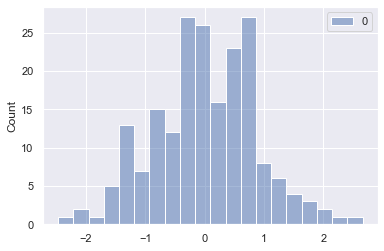

In [226]:
sns.histplot(transformed,bins = 20)

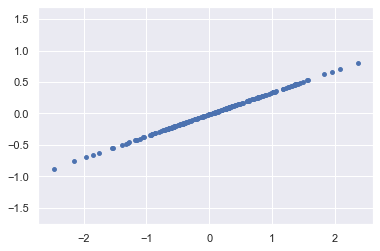

In [229]:
reshaped = pca.inverse_transform(transformed)
plt.scatter(reshaped[:, 0], reshaped[:, 1],s=15)
plt.axis('equal');

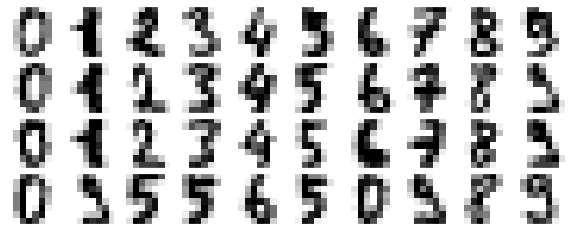

In [222]:
# helper function to print the digits to screen
def plot_digits(data):
	fig, axes = plt.subplots(4, 10, figsize=(10, 4),
							 subplot_kw={'xticks':[], 'yticks':[]},
							 gridspec_kw=dict(hspace=0.1, wspace=0.1))
	for i, ax in enumerate(axes.flat):
		ax.imshow(data[i].reshape(8, 8),
			  cmap='binary', interpolation='nearest',clim=(0, 16))
# print to screen
plot_digits(digits.data)

Original size = (1797, 64)
New size = (1797, 2)


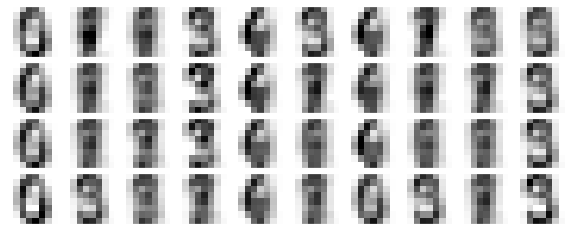

In [216]:
# function to perform PCA - takes a datset and a value for k
# where k = the # of components
def projector(data, k):
	# define the PCA model 
	pca = PCA(k)
	# create a PCA transform
	projected = pca.fit_transform(data.data)
	# print the old size and the new size
	print("Original size = " + str(data.data.shape))
	print("New size = " + str(projected.shape))
	# create a transformed dataset based on the transform
	components = pca.fit_transform(data.data)
	# reshape the transform back to the original space
	reshaped = pca.inverse_transform(components)
	# return this object
	return reshaped

# run and print a projection based on 2 components
projected = projector(digits, 2)
plot_digits(projected)

### 学习曲线

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    print(train_sizes.shape)
    print(train_scores.shape)
    print(test_scores.shape)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title,font='Microsoft YaHei')
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数",font='Microsoft YaHei')
        plt.ylabel(u"得分",font='Microsoft YaHei')
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best",prop = legend_font)
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"学习曲线",X, y)

## 代码

### 线性回归

In [1]:
# !pip install scikit-learn or !pip install --user scikit-learn

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

# Only works on Jupyter/Anaconda
%matplotlib inline  

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# import a standard dataset - the Boston house price index
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
# show the dataset
print(boston_dataset)

# print a return space
print('\n')

# show the keys
print(boston_dataset.keys())

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [5]:
boston_Y = boston_dataset.target
boston_Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [25]:
boston.loc[0,:]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64

In [40]:
data = boston_dataset['data']
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [41]:
x = np.insert(data, 0, values=1, axis=1)
x

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [44]:
x.shape

(506, 14)

In [42]:
y = boston_Y
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [48]:
result = np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))
result

array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

In [49]:
b = result[0]
k = result[1:]

From here we can build our model. Let's recall that the model we want is of the form:

$ Y = a + b_{1}x_{1} + b_{2}x_{2} + [...] + b_{13}x_{13} + e $

Where $ Y $ is our target variable _(boston\_Y),_ $ a $ is the intercept, the various $ b $ values (1 to 13) represent the effect of the corresponding $ x $ values (1 to 13) on the slope and $ e $ is the error.

We start by defining a model and 'fitting' it to the data:

In [87]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

# fit the model to the training data
lin_model_fit = lin_model.fit(boston, boston_Y)

In [88]:
# print the alpha value of the model (intercept)
print("Alpha/intercept (a)")
print(f"这是截距:{lin_model_fit.intercept_}")
print(f"b={b}")
print("\n")

# print the beta values of the model (co-efficients)
betas = lin_model_fit.coef_
counter = 0
for col in boston.columns:
    if counter == 0:
        print("Beta weights/co-efficients (b1 to b13)")
        print("-----------------------------------------")
    print(col + ": " + str(round(betas[counter], 4)) + ",Manual:" + str(round(k[counter],4)))
    counter +=1

Alpha/intercept (a)
这是截距:3.907985046680551e-14
b=36.45948838509594


Beta weights/co-efficients (b1 to b13)
-----------------------------------------
CRIM: 0.0,Manual:-0.108
ZN: 0.0,Manual:0.0464
INDUS: 0.0,Manual:0.0206
CHAS: 0.0,Manual:2.6867
NOX: 0.0,Manual:-17.7666
RM: 0.0,Manual:3.8099
AGE: 0.0,Manual:0.0007
DIS: 0.0,Manual:-1.4756
RAD: -0.0,Manual:0.306
TAX: 0.0,Manual:-0.0123
PTRATIO: -0.0,Manual:-0.9527
B: -0.0,Manual:0.0093
LSTAT: -0.0,Manual:-0.5248


IndexError: index 13 is out of bounds for axis 0 with size 13

In [10]:
lin_model_fit.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [89]:
# predict every Y value in the dataset
boston_predict = lin_model_fit.predict(boston)

# calculate RMSE (root mean square error) and R^2 (predictive power)
from sklearn.metrics import mean_squared_error, r2_score
rmse = (np.sqrt(mean_squared_error(boston_Y, boston_predict)))
r2 = r2_score(boston_Y, boston_predict)

# print the performance metrics
print("Model performance")
print("--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

Model performance
--------------------------------------
RMSE is 1.898215878261481e-14
R2 score is 1.0


In [17]:
# RMSE算法
total = 0
for i in range(len(boston_Y)):
    total+=(boston_Y[i]-boston_predict[i])**2
np.sqrt(total/len(boston_Y))

4.679191295697282

In [19]:
# R-squared
total1 = total2 = 0
for i in range(len(boston_Y)):
    total1 += (boston_Y[i]-boston_predict[i])**2
    total2 += (boston_Y[i]-np.mean(boston_Y))**2
1-total1/total2

0.7406426641094095

### 分配训练集

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns 
%matplotlib inline  

from sklearn.datasets import load_boston
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_Y = boston_dataset.target

In [92]:
from sklearn.model_selection  import train_test_split

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(boston, boston_Y, test_size = 0.2)

test_size指的是测试集的比例，这个是随机分配的

In [94]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [95]:
print(boston.shape[0])

506


In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)
y_predict = lin_model.predict(X_test)
r2_score(Y_test,y_predict)
# r2_score(y_true,y_predict)

0.7735659345760408

In [113]:
lin_model.score(X_test,Y_test)

0.7735659345760408

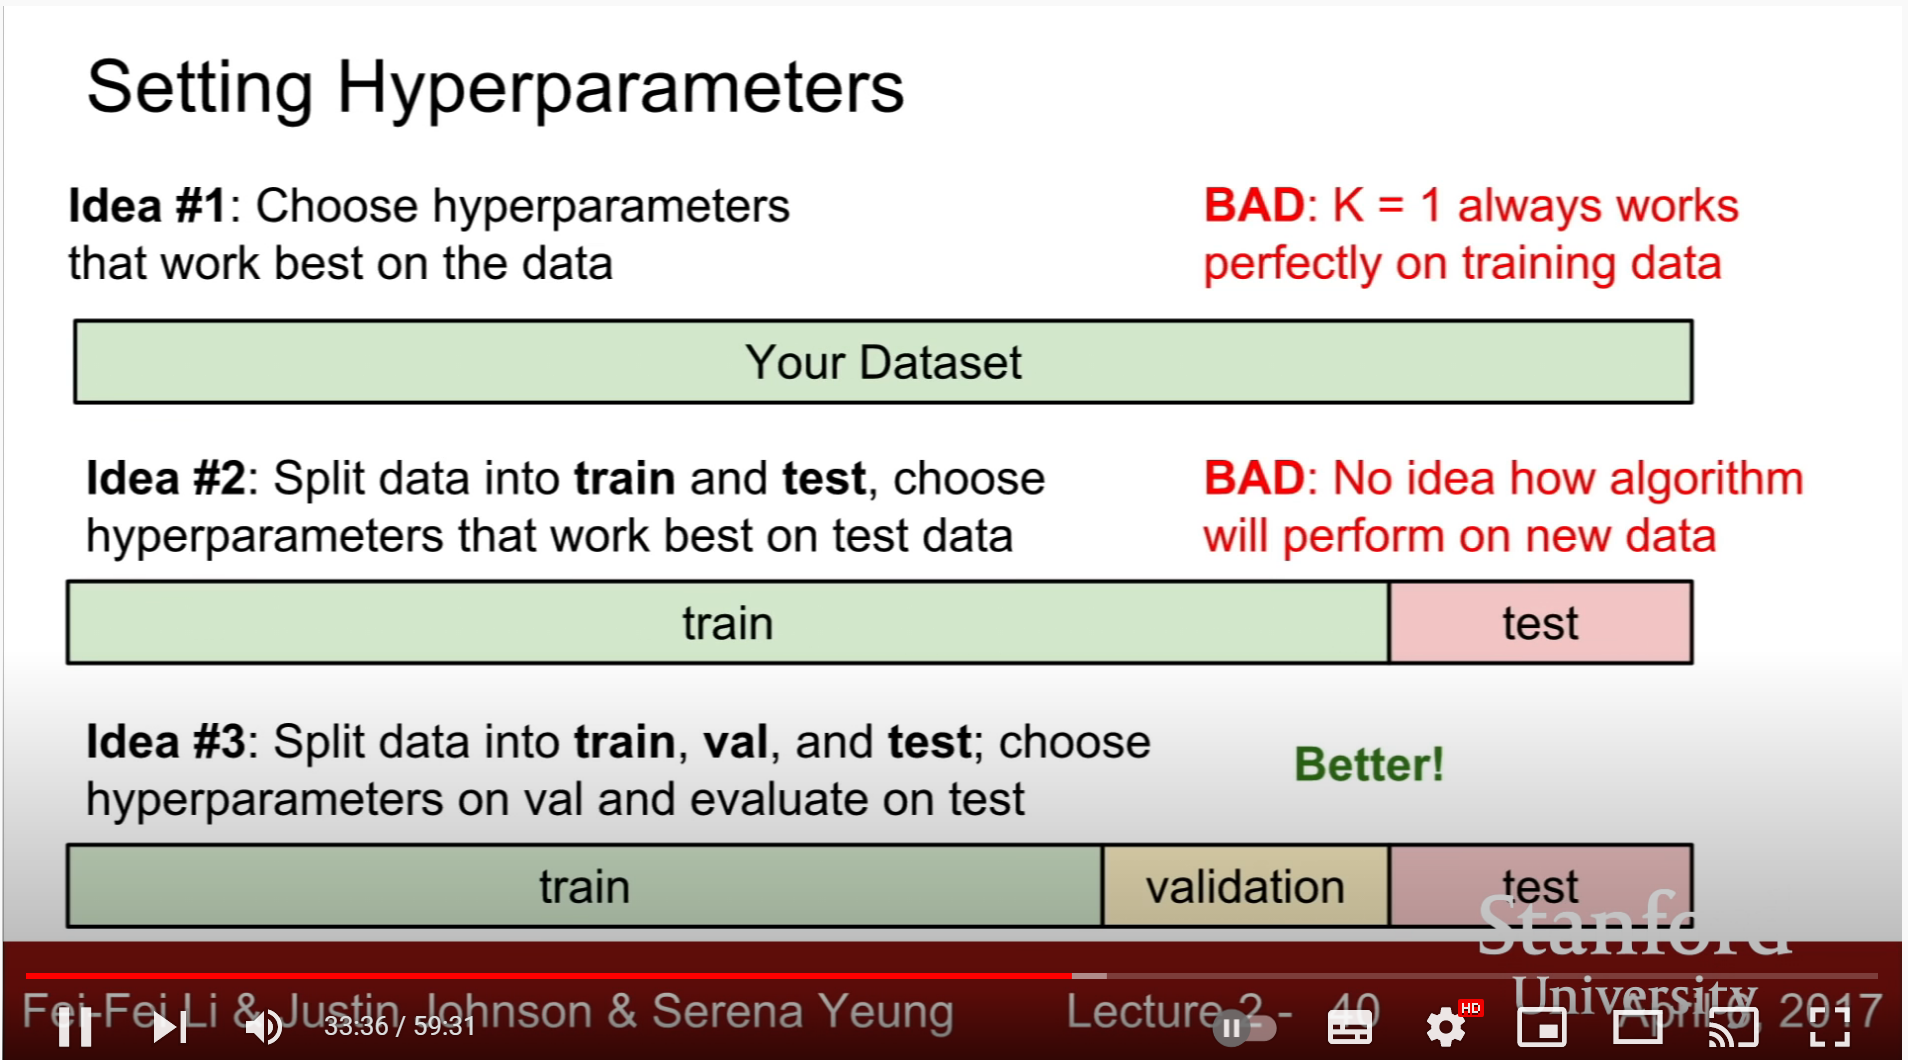

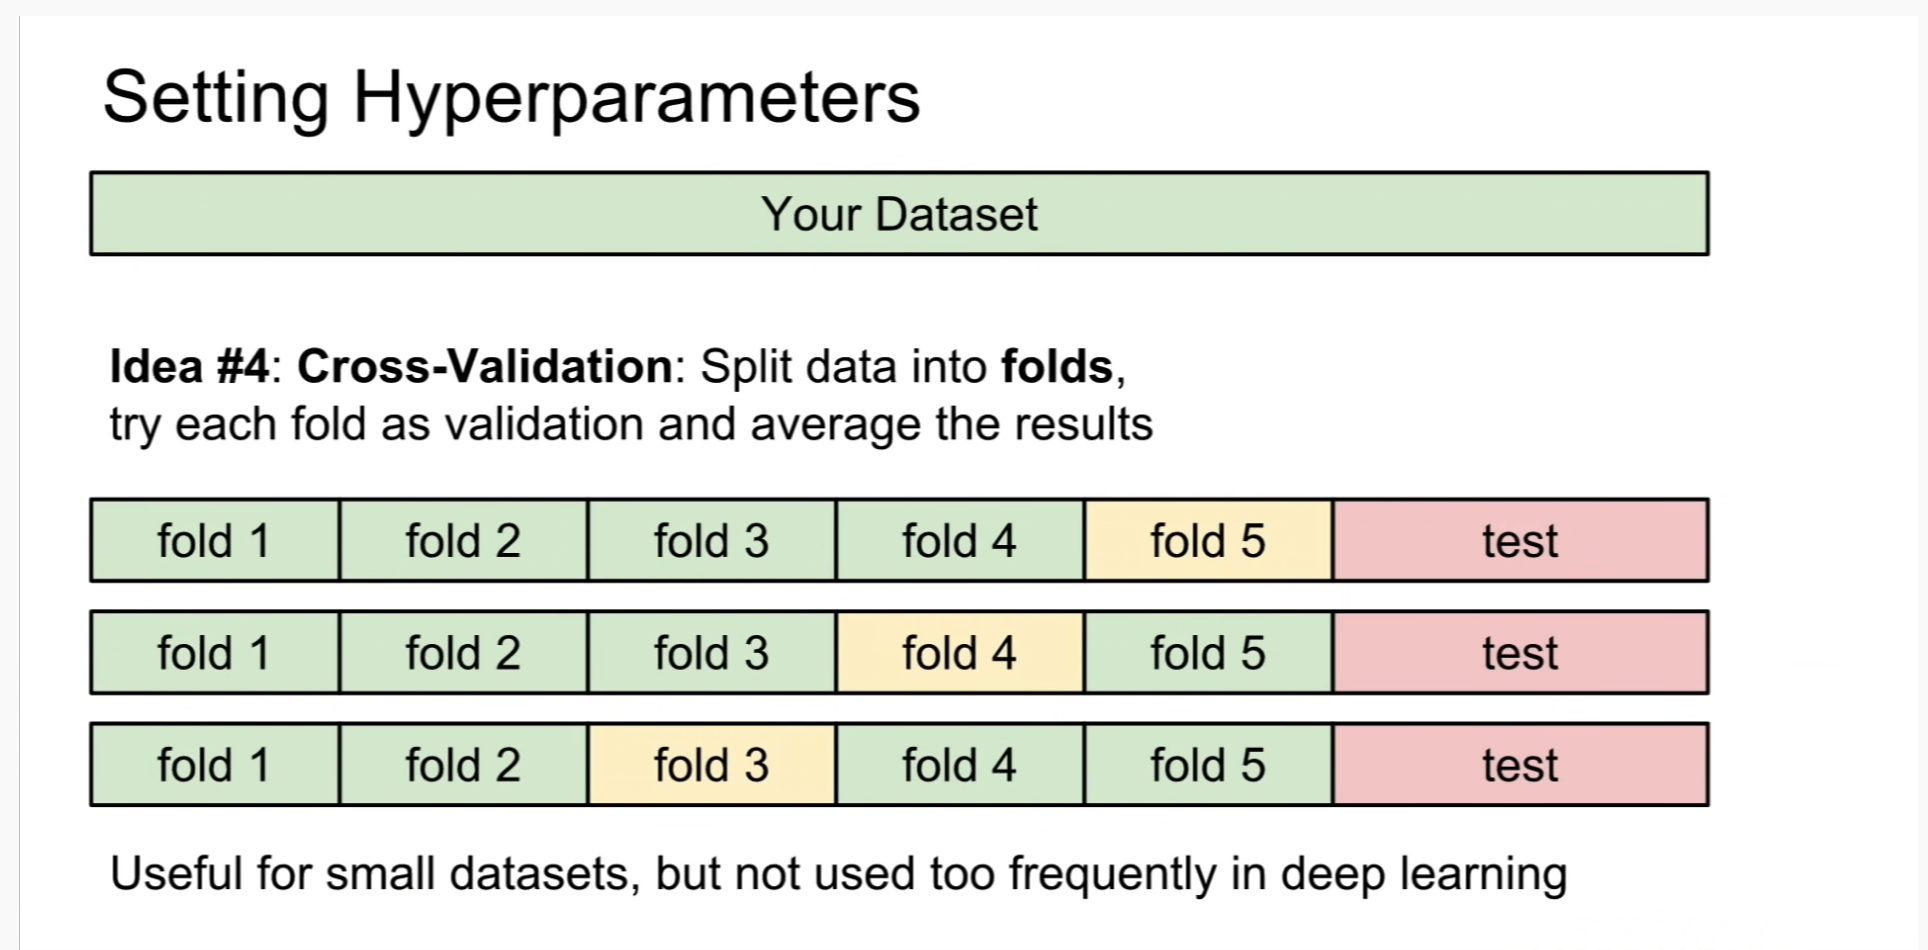

# Data Analysis 

In [67]:
# !pip install scikit-learn or !pip install --user scikit-learn

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

# Only works on Jupyter/Anaconda
%matplotlib inline 

# import a standard dataset - the Boston house price index
from sklearn.datasets import load_boston
boston_dataset = load_boston()

# convert to data frame using Pandas
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [68]:
# add the target value (Median Value)
boston['MV'] = boston_dataset.target
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT    MV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [69]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MV       506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [70]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MV         0
dtype: int64

In [71]:
# Percent of data which is not available
boston.isnull().sum()/len(boston) * 100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MV         0.0
dtype: float64

In [72]:
boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT          MV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

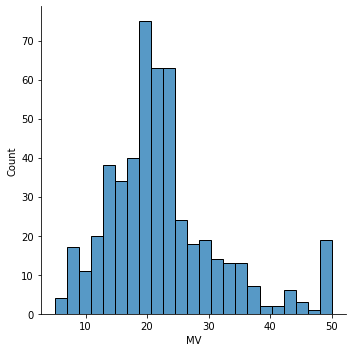

In [73]:
ax = sns.displot(boston.MV)

## 相关系数矩阵

<AxesSubplot:>

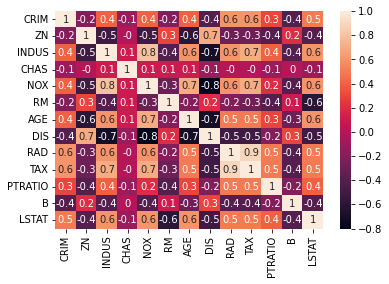

In [3]:
# create a correlation matrix rounding to one decimal point
# correlation_matrix = boston.corr()
correlation_matrix = boston.corr().round(1)
# 取一位小数，不然图片看不清楚
# print a correlation heat map
sns.heatmap(data=correlation_matrix, annot=True)

In [16]:
cmap = sns.diverging_palette( 220 , 10 , as_cmap = False )
type(cmap)

seaborn.palettes._ColorPalette

In [17]:
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
type(cmap)

matplotlib.colors.LinearSegmentedColormap

In [27]:
def plot_correlation_map(df):
    corr = df.corr().round(2)
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = False ) # 如果as_cmap = True的话返回的是Colormap
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, # 方形
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

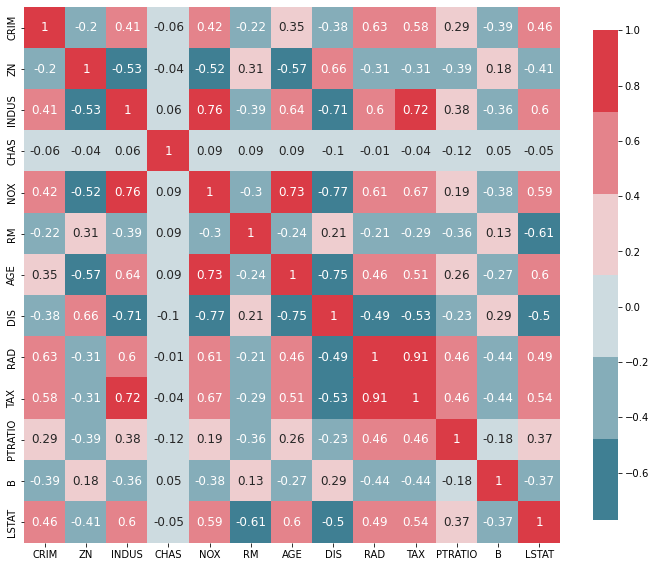

In [28]:
plot_correlation_map(boston)

## 列名处理

In [79]:
# create example dataframe
df = pd.DataFrame({"a": [1,2,3,4,5], "degree": ["MSc eBM", "BA Art", "MSc CSM", "BSc CS", "MSc eBM"]})
df

a   degree
0  1  MSc eBM
1  2   BA Art
2  3  MSc CSM
3  4   BSc CS
4  5  MSc eBM

In [80]:
df[['degree', 'subject']] = df['degree'].str.split(' ', 1, expand=True)
df

a degree subject
0  1    MSc     eBM
1  2     BA     Art
2  3    MSc     CSM
3  4    BSc      CS
4  5    MSc     eBM

In [84]:
df['degree'].str.replace('M','m')

0    mSc
1     BA
2    mSc
3    BSc
4    mSc
Name: degree, dtype: object

## 混淆矩阵

In [4]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [3]:
from sklearn.metrics import confusion_matrix
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

(56,)
           ❤️    ⚾    😄    😞   🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            6    0    0    1    0    7
1            0    8    0    0    0    8
2            2    0   16    0    0   18
3            1    1    2   12    0   16
4            0    0    1    0    6    7
All          9    9   19   13    6   56


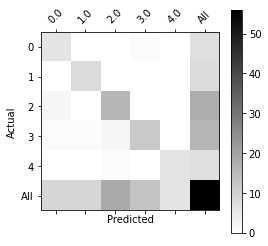

In [69]:
# START SKIP FOR GRADING
print(Y_test.shape)
print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)
# END SKIP FOR GRADING